In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [3]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [4]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [6]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [7]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [8]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [9]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [10]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [11]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [12]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [13]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [14]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [15]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [16]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [17]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [18]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [19]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [20]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [21]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [22]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [23]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [24]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [25]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [26]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [27]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
import numpy as np
import scipy.stats as stats

In [28]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full')
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [29]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full')
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [30]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [31]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [32]:
def analyze_clusters(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))

    for i in range(len(np.unique(labels))):
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        for x in X[labels == i]:
            plt.plot(x, color='#de7100', linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
    plt.tight_layout()
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [33]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [34]:
def draw_scores(k, silhouette, separation, density, method, album_type):
    
    fig = plt.subplots(figsize=(20, 5))
    fig_dims = (1, 3)
    
    ax = plt.subplot2grid(fig_dims, (0, 0))
    ax.plot(k, silhouette)
    plt.xlabel('K')
    plt.ylabel('SIL')
    plt.title(album_type + ' Silhouette Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 1))
    ax.plot(k, separation)
    plt.xlabel('K')
    plt.ylabel('SEP')
    plt.title(album_type + ' Separation Score \n' + str(method) + "-linkage")
    
    ax = plt.subplot2grid(fig_dims, (0, 2))
    ax.plot(k, density)
    plt.xlabel('K')
    plt.ylabel('VRC')
    plt.title(album_type + ' Variance Ratio Criterion Score \n' + str(method) + "-linkage")
    
    plt.show()

In [35]:
def interpret_dendrogram(max_k, method, X):
    
    k = list(range(2, max_k+1))
    silhouette = []
    separation = []
    density = []
    
    for i in k:
        complete = AgglomerativeClustering(n_clusters=i, linkage=method, affinity='euclidean', connectivity=None)
        complete.fit(X)
        hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
        
        print('Cluster numbers: ', i)
        print('Cluster', dict(zip(bins, hist)))
        print()
        
        print('Silhouette Score', silhouette_score(X, complete.labels_))
        silhouette.append(silhouette_score(X, complete.labels_))
        
        print('Separation Score', davies_bouldin_score(X, complete.labels_))
        separation.append(davies_bouldin_score(X, complete.labels_))
        
        print('Variance Ratio Criterion Score', calinski_harabasz_score(X, complete.labels_))
        density.append(calinski_harabasz_score(X, complete.labels_))
        
        print()
        print('-------------------------------------------------')
        print()

    draw_scores(k, silhouette, separation, density, method, album_type)

In [100]:
def plot_dendrogram(model, cut_distance, linkage_mode, album_type, **kwargs):
    """
        Function which creates the linkage matrix (proximity/similarity matrix),
        with which plots the cooresponding obtained dendrogram.
    """
    # children_ = children of each non-leaf node
    # N.B. A node i greater than or equal to n_samples is a non-leaf node 
    # and has children children_[i - n_samples], with n_samples = len(labels_)
    counts = np.zeros(model.children_.shape[0])  
    n_samples = len(model.labels_) # labels_ = cluster labels for each point
    
    # create the counts of samples under each node:
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    # add cut line according to silhouette score
    if cut_distance:
        plt.axhline(y=cut_distance, c='k', linestyle="--")
    
    plt.title(album_type + '\nHierarchical Clustering by ' + str(linkage_mode))
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()

In [37]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [38]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [39]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [40]:
def plot_centroids_approximated(centers, X, album_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " centroids\nApproximated Clustering")
    plt.show()

In [41]:
def plot_mean_values_approximated(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nApproximated Clustering".format(album_type))
    
    plt.show()

<h2>Datasets Months</h2>

In [42]:
df_studio = pd.read_csv('df_day_studio.csv', index_col = 0)
df_live = pd.read_csv('df_day_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_day_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [44]:
album_type = "Studio_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [45]:
df_studio

1   2    3   4   5   6    7   8   9  10  ...  357  358  \
track_date_created                                            ...             
2009_studio          0   2    0   0   0   1    0   0  33   0  ...    8    0   
2010_studio         10  21   13  13   4  19   41  34  62  10  ...   55   63   
2011_studio         12  23   85  77  51  29   58  10  35  54  ...  110   21   
2012_studio          9  67   50  46  14   0    5   9  29  77  ...   47   10   
2013_studio         28  33  188  61   6  10  117  85  91  89  ...   16    9   
2014_studio          9  41   57  17  35  40   46  31  13  63  ...   11   25   
2015_studio         50  38   29  33  21   7   32   4  36  22  ...   30   12   
2016_studio         41   6   22  68  99  48   41  73  81  24  ...   53   48   

                    359  360  361  362  363  364  365  366  
track_date_created                                          
2009_studio          20    5    2   78   25    3    3    0  
2010_studio           1   23    1   26   51   65    3    0  
2011_studio           0    2    9   27   38   20    2    0  
2012_studio          20   40   22   55   42   15   41   21  
2013_studio           0    6    6    7    0   80   42    0  
2014_studio          12    0   17   23   12   17   24    0  
2015_studio           8    2    1   15   10   30   44    0  
2016_studio          11   47    4   42   31   21   86  176  

[8 rows x 366 columns]

In [46]:
df_studio.shape

(8, 366)

In [47]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[  0.],
        [  2.],
        [  0.],
        ...,
        [  3.],
        [  3.],
        [  0.]],

       [[ 10.],
        [ 21.],
        [ 13.],
        ...,
        [ 65.],
        [  3.],
        [  0.]],

       [[ 12.],
        [ 23.],
        [ 85.],
        ...,
        [ 20.],
        [  2.],
        [  0.]],

       ...,

       [[  9.],
        [ 41.],
        [ 57.],
        ...,
        [ 17.],
        [ 24.],
        [  0.]],

       [[ 50.],
        [ 38.],
        [ 29.],
        ...,
        [ 30.],
        [ 44.],
        [  0.]],

       [[ 41.],
        [  6.],
        [ 22.],
        ...,
        [ 21.],
        [ 86.],
        [176.]]])

In [48]:
tss_studio.shape

(8, 366, 1)

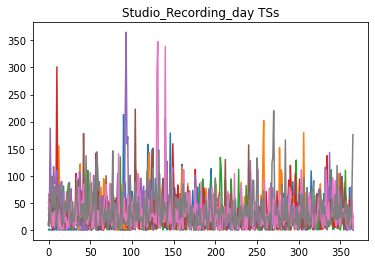

In [49]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [50]:
tss_studio_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio)
tss_studio_scaled

array([[[-0.73249705],
        [-0.66763038],
        [-0.73249705],
        ...,
        [-0.63519705],
        [-0.63519705],
        [-0.73249705]],

       [[-0.693914  ],
        [-0.3371199 ],
        [-0.59660652],
        ...,
        [ 1.09005647],
        [-0.92096479],
        [-1.01827227]],

       [[-0.54969667],
        [-0.1182973 ],
        [ 2.31322646],
        ...,
        [-0.23595167],
        [-0.94187792],
        [-1.02031417]],

       ...,

       [[-0.5712111 ],
        [ 0.56712894],
        [ 1.13629895],
        ...,
        [-0.28662609],
        [-0.03761421],
        [-0.89136923]],

       [[ 0.46456258],
        [ 0.14460667],
        [-0.09536027],
        ...,
        [-0.06869727],
        [ 0.30458462],
        [-0.86858705]],

       [[ 0.12379596],
        [-0.97442167],
        [-0.47237932],
        ...,
        [-0.50375697],
        [ 1.53579005],
        [ 4.35977823]]])

In [51]:
tss_studio_scaled.shape

(8, 366, 1)

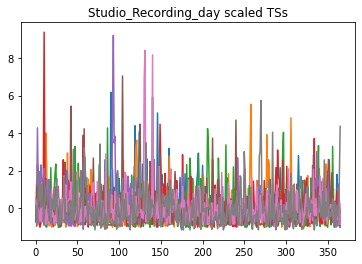

In [52]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [53]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   

                         357       358       359       360       361  \
track_date_created                                                     
2009_studio        -0.473030 -0.732497 -0.083830 -0.570330 -0.667630   
2010_studio         0.765698  1.025185 -0.985836 -0.272248 -0.985836   
2011_studio         3.293680 -0.196734 -1.020314 -0.941878 -0.667351   
2012_studio         0.609011 -0.668242 -0.323039  0.367368 -0.253998   
2013_studio        -0.511510 -0.706524 -0.957255 -0.790101 -0.790101   
2014_studio        -0.500065 -0.002041 -0.464492 -0.891369 -0.286626   
2015_studio        -0.068697 -0.548631 -0.655283 -0.815261 -0.841924   
2016_studio         0.500328  0.343439 -0.817533  0.312062 -1.037177   

                         362       363       364       365       366  
track_date_created                                                    
2009_studio         1.797303  0.078336 -0.635197 -0.635197 -0.732497  
2010_studio        -0.174941  0.635955  1.090056 -0.920965 -1.018272  
2011_studio         0.038575  0.469975 -0.235952 -0.941878 -1.020314  
2012_studio         0.885173  0.436409 -0.495640  0.401888 -0.288518  
2013_studio        -0.762242 -0.957255  1.271469  0.212825 -0.957255  
2014_studio        -0.073187 -0.464492 -0.286626 -0.037614 -0.891369  
2015_studio        -0.468642 -0.601957 -0.068697  0.304585 -0.868587  
2016_studio         0.155174 -0.189981 -0.503757  1.535790  4.359778  

[8 rows x 366 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  263.3907625271584 Silhouette Score:  0.027585538078196692

k:  3 SSE:  210.86781281731288 Silhouette Score:  0.04037623714010477

k:  4 SSE:  161.3967004415848 Silhouette Score:  0.05079251525167995

k:  5 SSE:  117.35164081047262 Silhouette Score:  0.04405357045425893

k:  6 SSE:  75.4314880240628 Silhouette Score:  0.03787919332569477

k:  7 SSE:  35.54923440168812 Silhouette Score:  0.020826416930751785



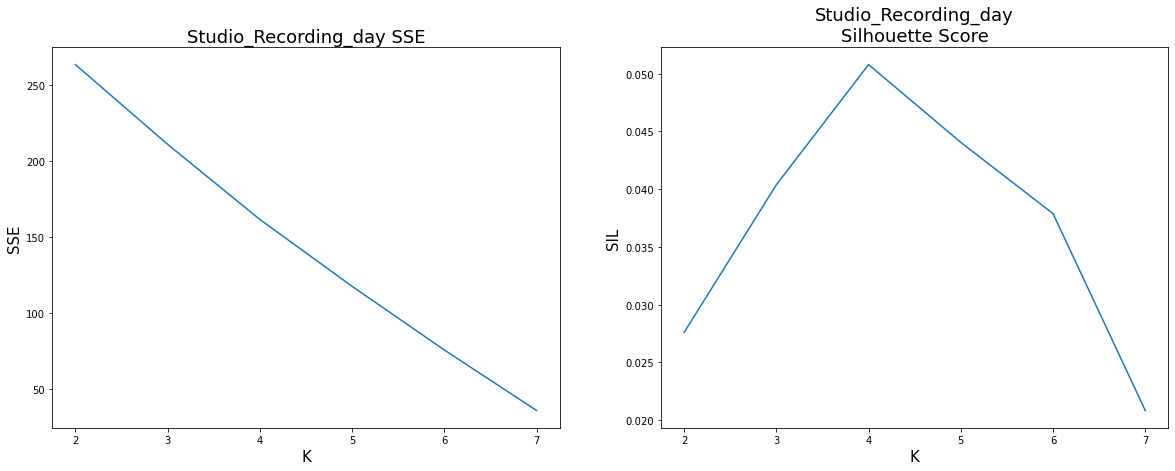

In [54]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [55]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(4, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 366, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  161.3967004415848
Silhouette Score:  0.05079251525167995


In [56]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.078336 -0.635197 -0.635197 -0.732497       0  
2010_studio         0.635955  1.090056 -0.920965 -1.018272       2  
2011_studio         0.469975 -0.235952 -0.941878 -1.020314       3  
2012_studio         0.436409 -0.495640  0.401888 -0.288518       1  
2013_studio        -0.957255  1.271469  0.212825 -0.957255       1  
2014_studio        -0.464492 -0.286626 -0.037614 -0.891369       3  
2015_studio        -0.601957 -0.068697  0.304585 -0.868587       0  
2016_studio        -0.189981 -0.503757  1.535790  4.359778       2  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2015_studio']

Cluster 1
 ['2012_studio', '2013_studio']

Cluster 2
 ['2010_studio', '2016_studio']

Cluster 3
 ['2011_studio', '2014_studio']



**Centroids**

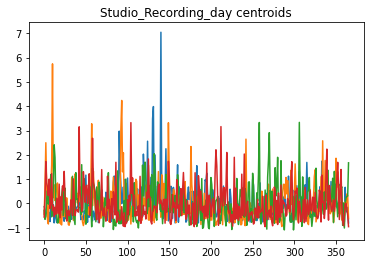

In [57]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

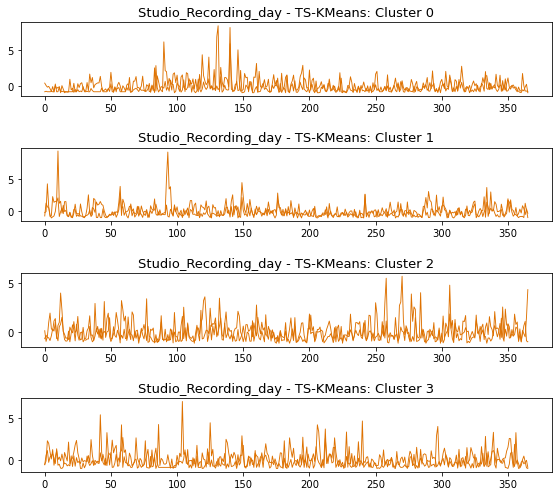

In [58]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  73.05055457829974 Silhouette Score:  0.07047888590635057

k:  3 SSE:  58.68710377186228 Silhouette Score:  0.04959207262520163

k:  4 SSE:  43.38781595428601 Silhouette Score:  0.044992179794109785

k:  5 SSE:  30.160757504089876 Silhouette Score:  0.03610870424384435

k:  6 SSE:  19.678769582445426 Silhouette Score:  0.03037152960161859

k:  7 SSE:  8.924531044112392 Silhouette Score:  0.005426324857264457



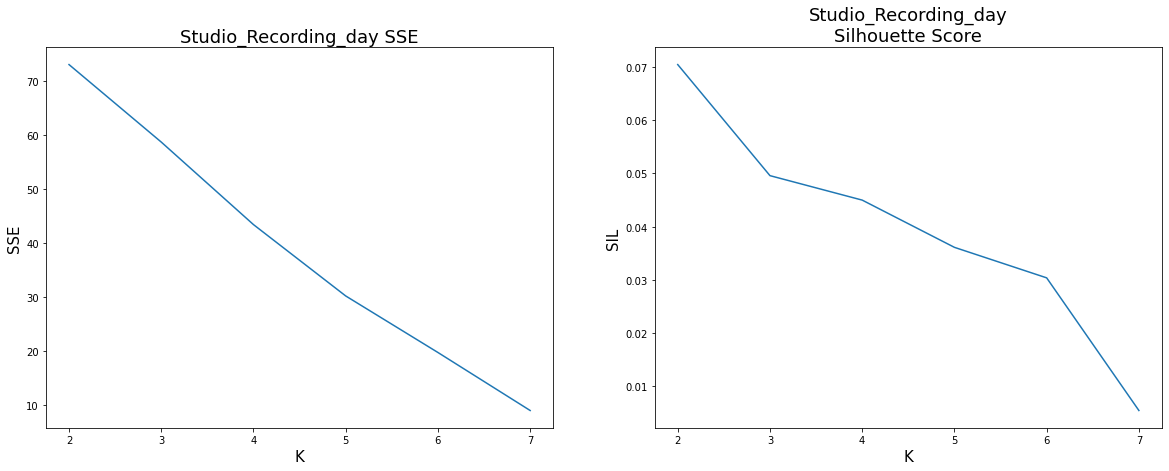

In [59]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [60]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(3, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 1, 1: 3, 2: 4}

SSE:  58.06200317044828
Silhouette Score:  0.05475185139722703


In [61]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.078336 -0.635197 -0.635197 -0.732497       2  
2010_studio         0.635955  1.090056 -0.920965 -1.018272       1  
2011_studio         0.469975 -0.235952 -0.941878 -1.020314       1  
2012_studio         0.436409 -0.495640  0.401888 -0.288518       0  
2013_studio        -0.957255  1.271469  0.212825 -0.957255       2  
2014_studio        -0.464492 -0.286626 -0.037614 -0.891369       2  
2015_studio        -0.601957 -0.068697  0.304585 -0.868587       2  
2016_studio        -0.189981 -0.503757  1.535790  4.359778       1  

[8 rows x 367 columns]

Cluster 0
 ['2012_studio']

Cluster 1
 ['2010_studio', '2011_studio', '2016_studio']

Cluster 2
 ['2009_studio', '2013_studio', '2014_studio', '2015_studio']



**Centroids**

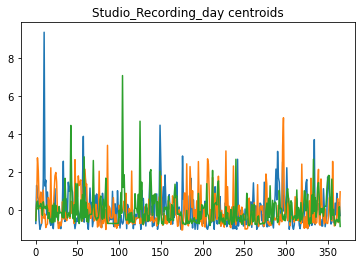

In [62]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

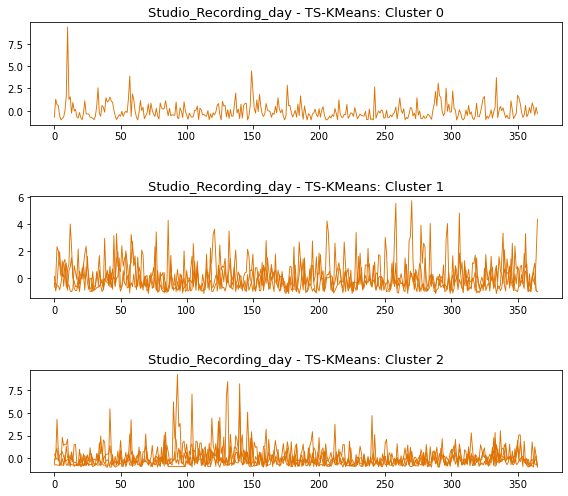

In [63]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  2086.107917517502 Silhouette Score:  0.03464035609293082
Calinski-Harabaz:  1.2908344111897192 Davies-Bouldin:  2.1550967701103

k:  3 SSE:  1686.9425025385028 Silhouette Score:  0.04037623714010484
Calinski-Harabaz:  1.2566651322349938 Davies-Bouldin:  1.6085352953591805

k:  4 SSE:  1291.1736035326778 Silhouette Score:  0.050792515251680145
Calinski-Harabaz:  1.2843484664526226 Davies-Bouldin:  1.3035676687249738

k:  5 SSE:  938.8131264837801 Silhouette Score:  0.044053570454259124
Calinski-Harabaz:  1.2750925026284627 Davies-Bouldin:  0.9662766164676079

k:  6 SSE:  603.451904192502 Silhouette Score:  0.03787919332569484
Calinski-Harabaz:  1.2802739135545176 Davies-Bouldin:  0.7422590617751079

k:  7 SSE:  284.3938752135046 Silhouette Score:  0.020826416930751837
Calinski-Harabaz:  1.3188969903363803 Davies-Bouldin:  0.49109641132507714



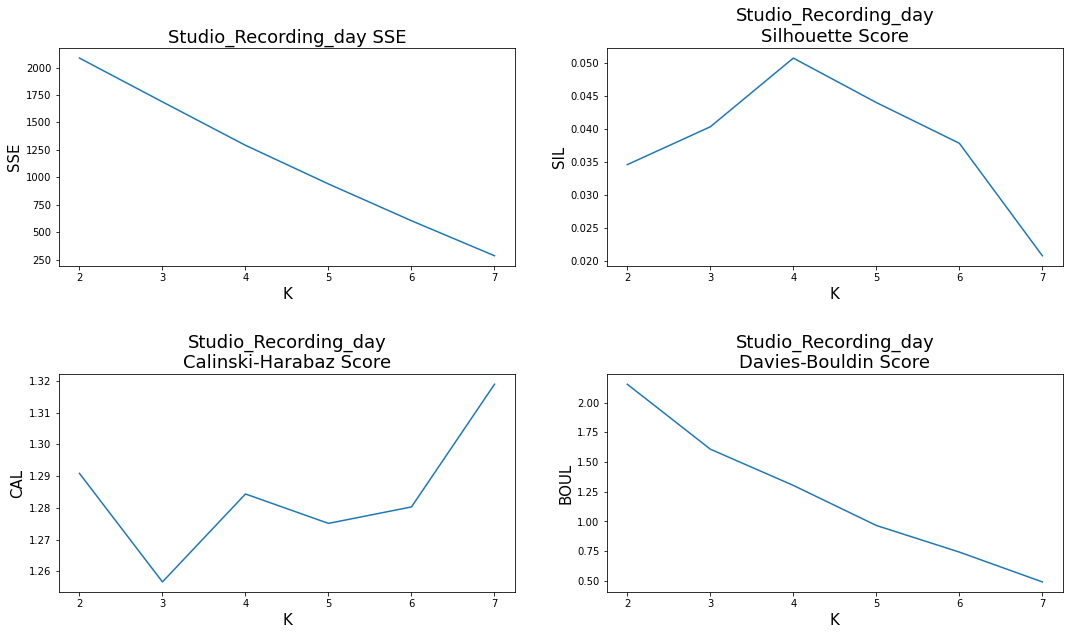

In [64]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [65]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(4, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (4, 366)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  1291.1736035326778
Silhouette Score:  0.050792515251680145
Calinski - Harabaz Score:  1.2843484664526226
Davies - Bouldin Score:  1.3035676687249738


In [66]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.078336 -0.635197 -0.635197 -0.732497       0  
2010_studio         0.635955  1.090056 -0.920965 -1.018272       2  
2011_studio         0.469975 -0.235952 -0.941878 -1.020314       3  
2012_studio         0.436409 -0.495640  0.401888 -0.288518       1  
2013_studio        -0.957255  1.271469  0.212825 -0.957255       1  
2014_studio        -0.464492 -0.286626 -0.037614 -0.891369       3  
2015_studio        -0.601957 -0.068697  0.304585 -0.868587       0  
2016_studio        -0.189981 -0.503757  1.535790  4.359778       2  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2015_studio']

Cluster 1
 ['2012_studio', '2013_studio']

Cluster 2
 ['2010_studio', '2016_studio']

Cluster 3
 ['2011_studio', '2014_studio']



<h3>DBSCAN</h3>

In [67]:
dist = pdist(df_tss_studio_scaled, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[27.294322   28.21143275 27.65662217 26.1289469  26.93395784 25.26095917
 26.89654981 27.73113192 26.55573176 27.17643167 26.61716986 26.60951993
 25.89830969 26.5406627  27.15313637 26.54658084 28.22781704 27.24917025
 23.84927149 25.90521881 27.00856261 27.71731614 27.27277668 27.69883535
 28.8593438  26.56595385 26.49138914 27.00054084]

[[ 0.         27.294322   28.21143275 27.65662217 26.1289469  26.93395784
  25.26095917 26.89654981]
 [27.294322    0.         27.73113192 26.55573176 27.17643167 26.61716986
  26.60951993 25.89830969]
 [28.21143275 27.73113192  0.         26.5406627  27.15313637 26.54658084
  28.22781704 27.24917025]
 [27.65662217 26.55573176 26.5406627   0.         23.84927149 25.90521881
  27.00856261 27.71731614]
 [26.1289469  27.17643167 27.15313637 23.84927149  0.         27.27277668
  27.69883535 28.8593438 ]
 [26.93395784 26.61716986 26.54658084 25.90521881 27.27277668  0.
  26.56595385 26.49138914]
 [25.26095917 26.60951993 28.22781704 27.00856261 27.698835

In [84]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

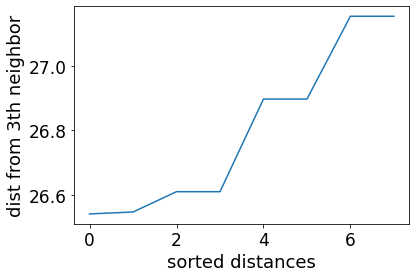

In [85]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [86]:
eps_to_test = np.arange(26.6, 26.7, 0.01)
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [26.6  26.61 26.62 26.63 26.64 26.65 26.66 26.67 26.68 26.69]
min_samples: [2, 3, 4, 5]


In [87]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [88]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 26.6 and min_samples =   2 |  None    1
  2 | Tested with eps = 26.6 and min_samples =   3 |  None    1
  3 | Tested with eps = 26.6 and min_samples =   4 | 26.503    1
  4 | Tested with eps = 26.6 and min_samples =   5 | 26.503    1
  5 | Tested with eps = 26.610000000000003 and min_samples =   2 |  None    1
  6 | Tested with eps = 26.610000000000003 and min_samples =   3 |  None    1
  7 | Tested with eps = 26.610000000000003 and min_samples =   4 |  None    1
  8 | Tested with eps = 26.610000000000003 and min_samples =   5 | 26.503    1
  9 | Tested with eps = 26.620000000000005 and min_samples =   2 |  None    1
 10 | Tested with eps = 26.620000000000005 and min_samples =   3 |  None    1
 11 | Tested with eps = 26.620000000000005 and min_samples =   4 |  None    1
 12 | Tested with eps = 26.620000000000005 and min_samples =   

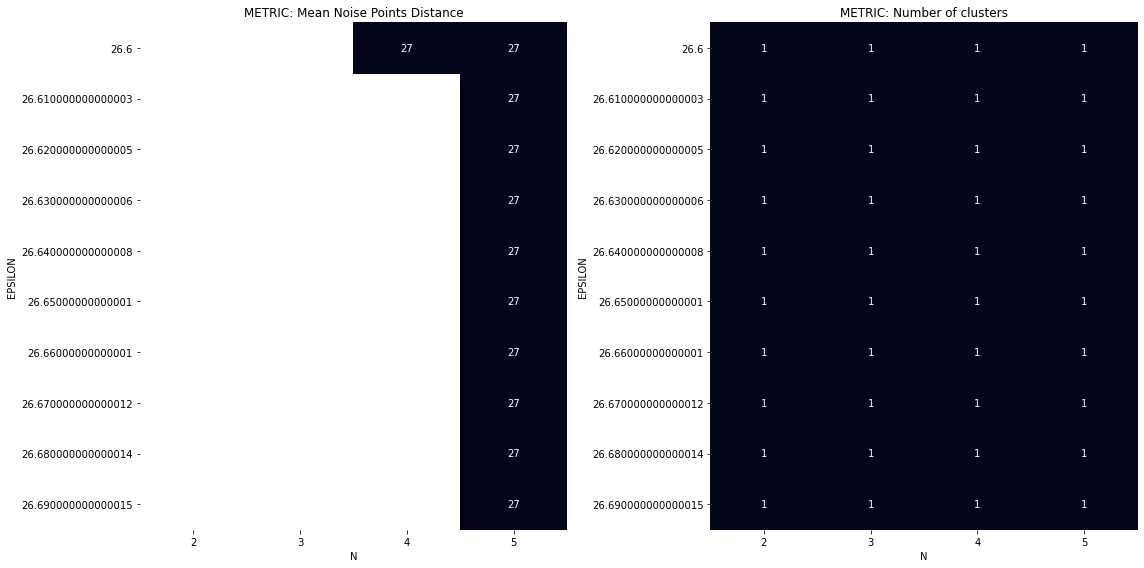

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [90]:
best_dbscan_model = DBSCAN(eps = 26.6, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_studio_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=26.6, min_samples=2)

In [91]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([0]), array([8]))

In [92]:
cluster_insight(df_tss_studio_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_studio         0.078336 -0.635197 -0.635197 -0.732497       0  
2010_studio         0.635955  1.090056 -0.920965 -1.018272       0  
2011_studio         0.469975 -0.235952 -0.941878 -1.020314       0  
2012_studio         0.436409 -0.495640  0.401888 -0.288518       0  
2013_studio        -0.957255  1.271469  0.212825 -0.957255       0  
2014_studio        -0.464492 -0.286626 -0.037614 -0.891369       0  
2015_studio        -0.601957 -0.068697  0.304585 -0.868587       0  
2016_studio        -0.189981 -0.503757  1.535790  4.359778       0  

[8 rows x 367 columns]

Cluster 0
 ['2009_studio', '2010_studio', '2011_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2016_studio']



<h3>Hierarchical Clustering</h3>

**Single**

In [93]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_scaled.values)

In [94]:
model_single.n_clusters_

8

In [95]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.020211251142225203
Separation Score 0.8316169769078746
Variance Ratio Criterion Score 1.0842244723021353

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 5, 1: 1, 2: 2}

Silhouette Score 0.019890794520366933
Separation Score 1.4225953204752326
Variance Ratio Criterion Score 1.1529967596550086

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.03776438074786321
Separation Score 1.2714290160092032
Variance Ratio Criterion Score 1.23566190576006

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 2}

Silhouette Score 0.044053570454259124
Separation Score 0.9662766164676079
Variance Ratio Criterion Score 1.2750925026284627

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.0378791933

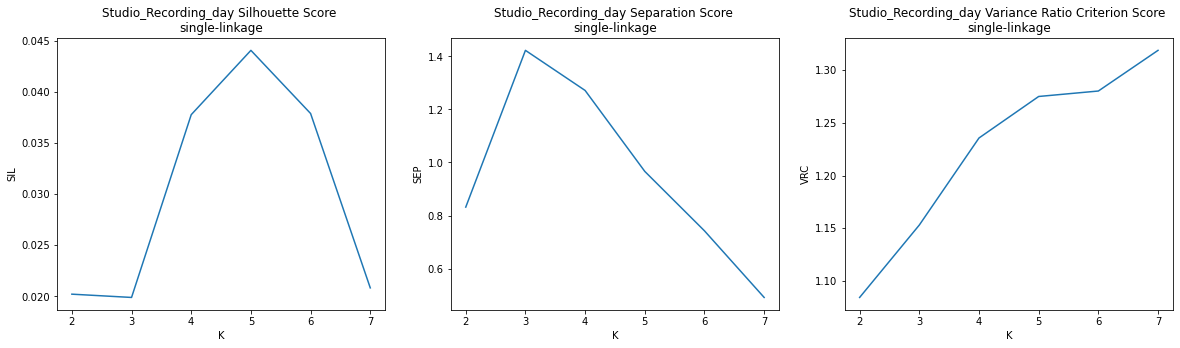

In [96]:
interpret_dendrogram(7, 'single', df_tss_studio_scaled.values)

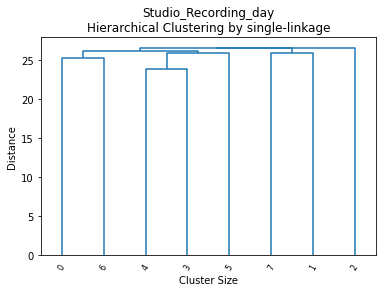

In [101]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

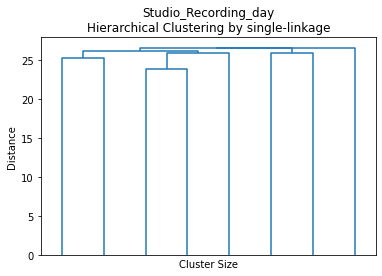

In [102]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [103]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_scaled.values)

In [104]:
model_complete.n_clusters_

8

In [105]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 4, 1: 4}

Silhouette Score 0.03464035609293082
Separation Score 2.1550967701103
Variance Ratio Criterion Score 1.2908344111897192

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.04037623714010484
Separation Score 1.6085352953591805
Variance Ratio Criterion Score 1.2566651322349938

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.050792515251680145
Separation Score 1.3035676687249738
Variance Ratio Criterion Score 1.2843484664526226

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.044053570454259124
Separation Score 0.9662766164676079
Variance Ratio Criterion Score 1.2750925026284627

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.037879193325

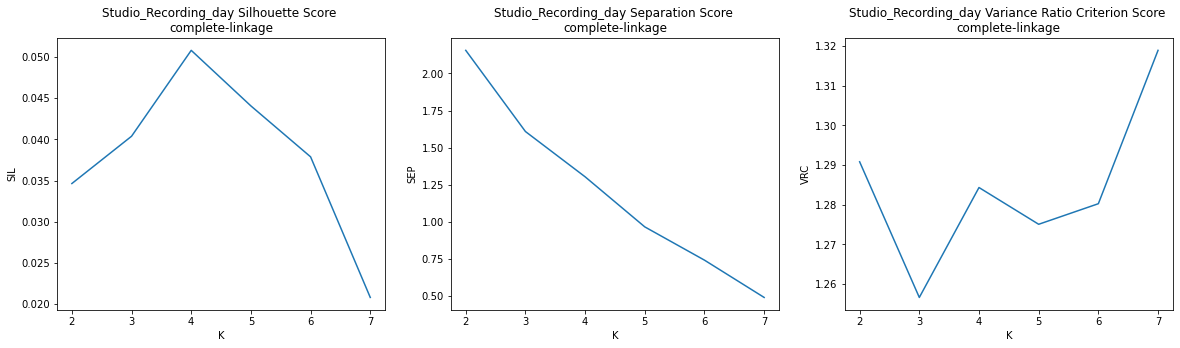

In [106]:
interpret_dendrogram(7, 'complete', df_tss_studio_scaled.values)

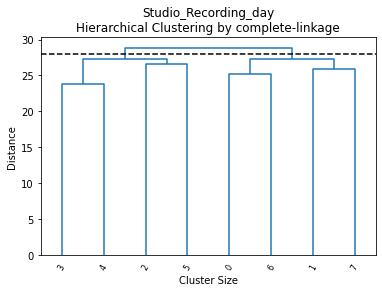

In [110]:
cut_distance = 28
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

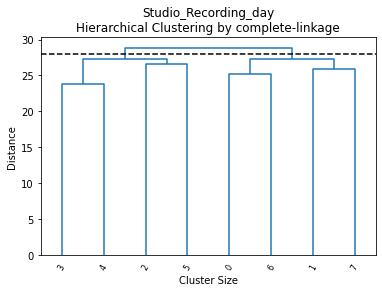

In [111]:
cut_distance = 28
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [112]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_studio_scaled.values)

In [113]:
model_average.n_clusters_

8

In [114]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 4, 1: 4}

Silhouette Score 0.03464035609293082
Separation Score 2.1550967701103
Variance Ratio Criterion Score 1.2908344111897192

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.04037623714010484
Separation Score 1.6085352953591805
Variance Ratio Criterion Score 1.2566651322349938

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.050792515251680145
Separation Score 1.3035676687249738
Variance Ratio Criterion Score 1.2843484664526226

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.044053570454259124
Separation Score 0.9662766164676079
Variance Ratio Criterion Score 1.2750925026284627

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.037879193325

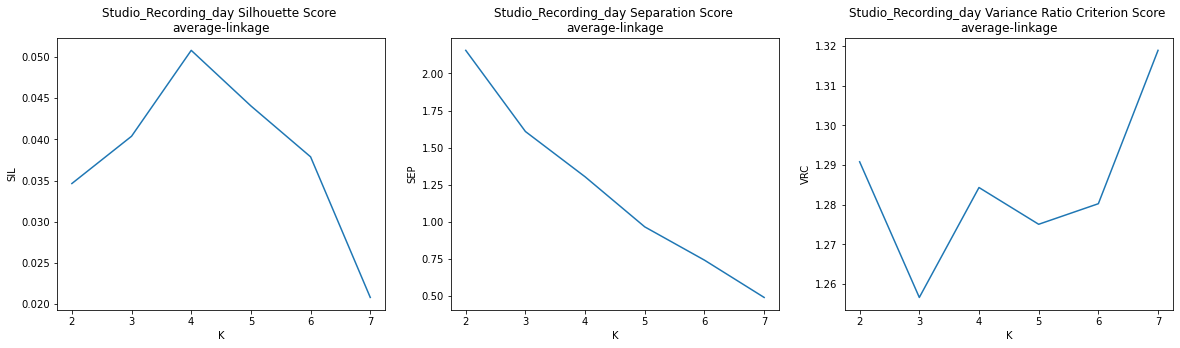

In [115]:
interpret_dendrogram(7, 'average', df_tss_studio_scaled.values)

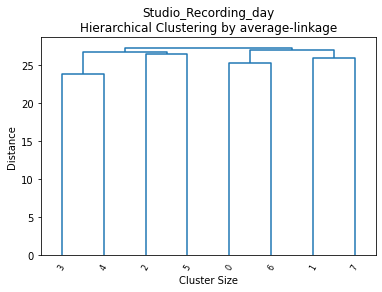

In [117]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

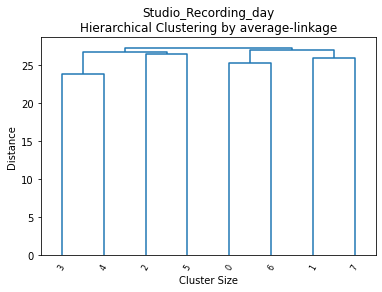

In [118]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [119]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_studio_scaled.values)

In [120]:
model_ward.n_clusters_

8

In [121]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 6, 1: 2}

Silhouette Score 0.03657959574357366
Separation Score 1.7108188982739776
Variance Ratio Criterion Score 1.2592503410002187

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 4, 1: 2, 2: 2}

Silhouette Score 0.04464080780969719
Separation Score 1.6151880089330308
Variance Ratio Criterion Score 1.2772192162399736

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 2, 3: 2}

Silhouette Score 0.050792515251680145
Separation Score 1.3035676687249738
Variance Ratio Criterion Score 1.2843484664526226

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.044053570454259124
Separation Score 0.9662766164676079
Variance Ratio Criterion Score 1.2750925026284627

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.037879193

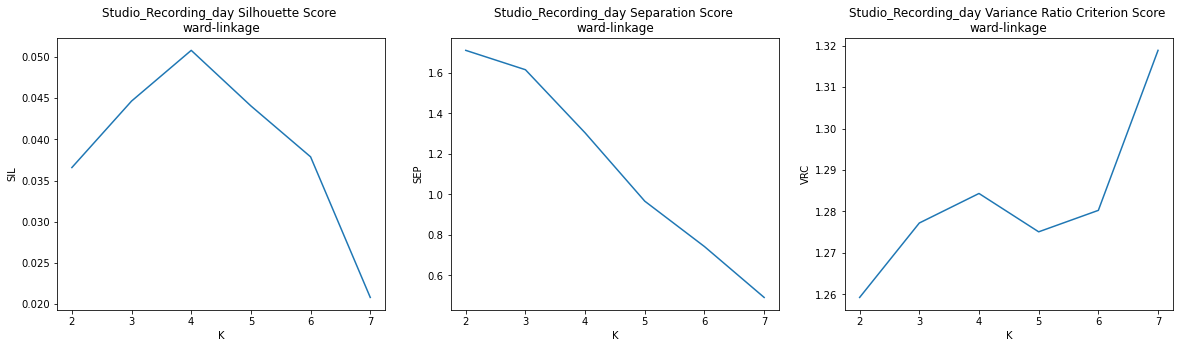

In [122]:
interpret_dendrogram(7, 'ward', df_tss_studio_scaled.values)

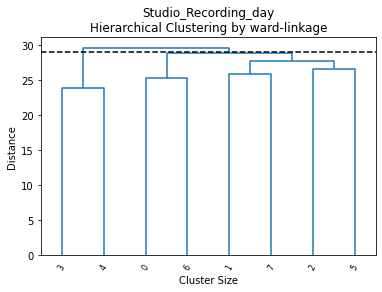

In [125]:
cut_distance = 29
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

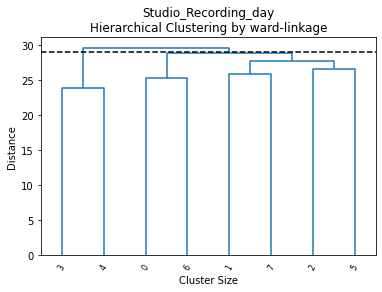

In [126]:
cut_distance = 29
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [127]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  94.0985226031484 Silhouette Score:  0.7278608726442664
Calinski-Harabaz:  38.06897047151652 Davies-Bouldin:  0.36989164893848975

k:  3 SSE:  47.17546236109316 Silhouette Score:  0.7166935961609876
Calinski-Harabaz:  34.12589976570347 Davies-Bouldin:  0.29679195398636127

k:  4 SSE:  3.4993137198608184 Silhouette Score:  0.7285397978271415
Calinski-Harabaz:  262.00877987879124 Davies-Bouldin:  0.16136926583596653

k:  5 SSE:  1.4696200172805067 Silhouette Score:  0.6439957071543454
Calinski-Harabaz:  351.96234785617133 Davies-Bouldin:  0.1137221706183058

k:  6 SSE:  0.03176308992505185 Silhouette Score:  0.47041223748579397
Calinski-Harabaz:  8703.255771098471 Davies-Bouldin:  0.024652282808038634

k:  7 SSE:  0.01363032324014006 Silhouette Score:  0.22629392516936025
Calinski-Harabaz:  8450.812939107976 Davies-Bouldin:  0.019620477274244687



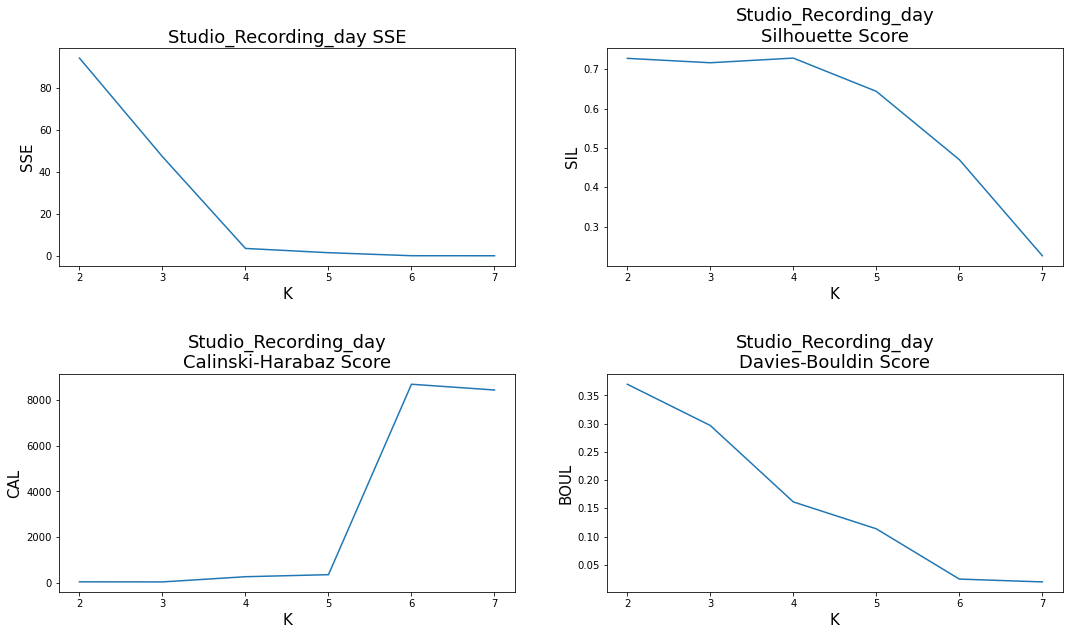

In [128]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [129]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(4, 300, 10, "", F, True)

cluster_centers_shape (4, 5)

Labels:  {0: 3, 1: 2, 2: 1, 3: 2}

SSE:  3.4993137198608184
Silhouette Score:  0.7285397978271415
Calinski - Harabaz Score:  262.00877987879124
Davies - Bouldin Score:  0.16136926583596653


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

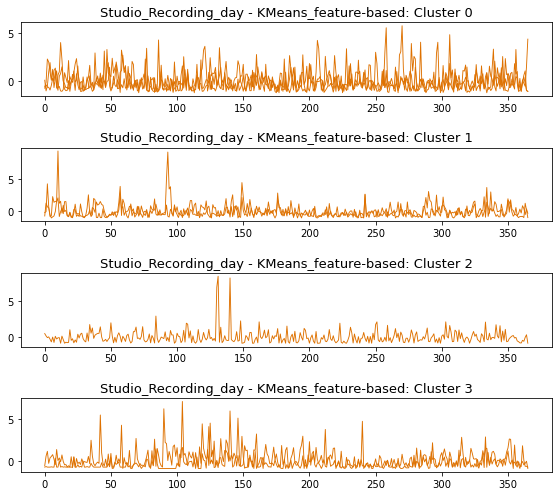

In [130]:
analyze_clusters(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

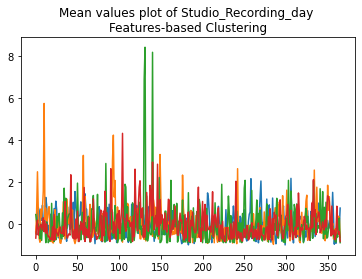

In [131]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [132]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [133]:
print(tss_studio_scaled.shape, M.shape)

(8, 366, 1) (8, 8)


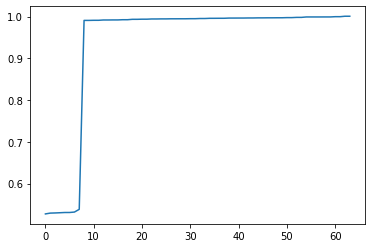

In [134]:
plt.plot(sorted(M.ravel()))
plt.show()

In [135]:
dbscan_compression_studio = DBSCAN(eps=0.99, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.99, metric='precomputed')

In [136]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [137]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

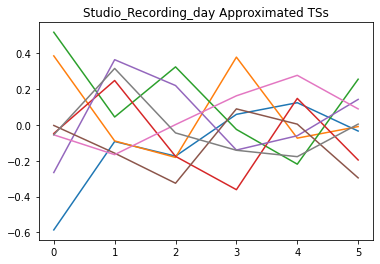

In [138]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  0.1389162456134995 Silhouette Score:  0.38093965457653634

k:  3 SSE:  0.08303705936518382 Silhouette Score:  0.2602376459904473

k:  4 SSE:  0.05042174258314478 Silhouette Score:  0.18400063900326588

k:  5 SSE:  0.02490559088057921 Silhouette Score:  0.20614028974900267

k:  6 SSE:  0.01161202166615304 Silhouette Score:  0.18168408432505667

k:  7 SSE:  0.001381026421108648 Silhouette Score:  0.162630013689819



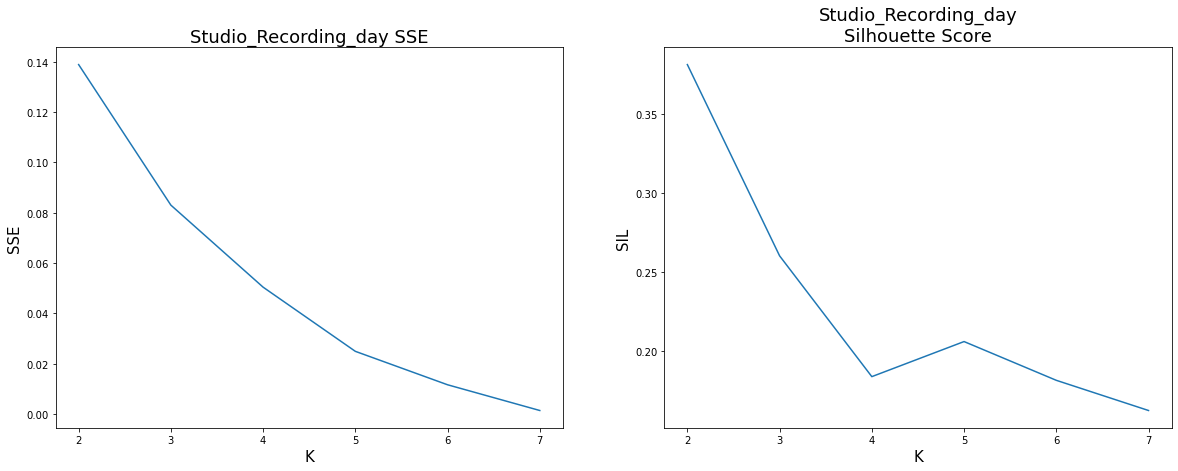

In [139]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [140]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  0.08303705936518382
Silhouette Score:  0.2602376459904473


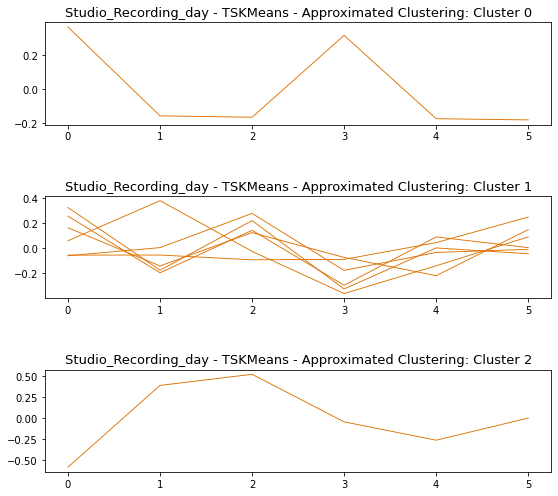

In [141]:
analyze_clusters(labels_studio_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

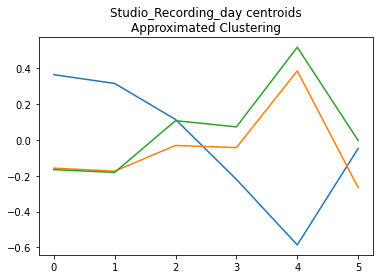

In [142]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type)

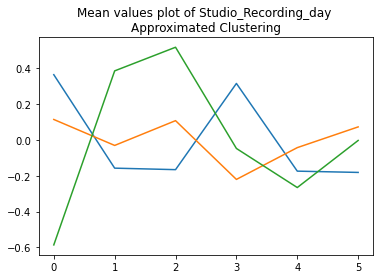

In [143]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [145]:
album_type = "Live_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [146]:
df_live

1    2   3  4  5   6   7   8   9  10  ...  357  358  359  \
track_date_created                                        ...                  
2009_live           0  128   0  0  1  11   0   0   0   0  ...    0    0    0   
2010_live           0    0   2  0  1   0   1  19   2   0  ...    0    0    0   
2011_live           4    1   0  0  0   0   1   1   0   0  ...    0    0    0   
2012_live           0    0   0  8  0   0   0   0   0   6  ...    0    0    0   
2013_live           0    0  17  0  0   0   0   0   0   6  ...    0    0    0   
2014_live           0   21   0  0  0   0   0   0   7   7  ...    0    0    0   
2015_live           0    0   0  0  1   0   0   5  13   0  ...    0    0    0   
2016_live           0    0   0  0  3   1  18   1   0   0  ...    3   22    0   

                    360  361  362  363  364  365  366  
track_date_created                                     
2009_live             0    1    9    0    0    0    0  
2010_live             1    0    1    0    0    0    0  
2011_live             0    0    0    0    0    0    0  
2012_live             0    0    0    0    0    0    0  
2013_live             0    0    0    0    0    0    0  
2014_live             0    0    0    0    0    0    0  
2015_live             0    0    0    7   13    8    0  
2016_live             0    0    0    2    0    0    0  

[8 rows x 366 columns]

In [147]:
df_live.shape

(8, 366)

In [148]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[  0.],
        [128.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  2.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  4.],
        [  1.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[  0.],
        [ 21.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [ 13.],
        [  8.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]]])

In [149]:
tss_live.shape

(8, 366, 1)

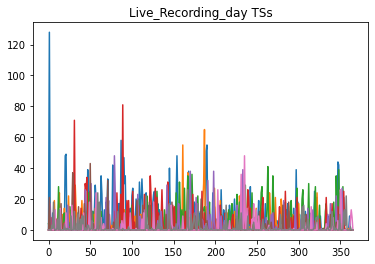

In [150]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [151]:
tss_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_live)
tss_live_scaled

array([[[-0.55366905],
        [ 9.48825419],
        [-0.55366905],
        ...,
        [-0.55366905],
        [-0.55366905],
        [-0.55366905]],

       [[-0.47338066],
        [-0.47338066],
        [-0.20350944],
        ...,
        [-0.47338066],
        [-0.47338066],
        [-0.47338066]],

       [[-0.08665189],
        [-0.44979605],
        [-0.57084411],
        ...,
        [-0.57084411],
        [-0.57084411],
        [-0.57084411]],

       ...,

       [[-0.27827153],
        [ 4.0425264 ],
        [-0.27827153],
        ...,
        [-0.27827153],
        [-0.27827153],
        [-0.27827153]],

       [[-0.31186708],
        [-0.31186708],
        [-0.31186708],
        ...,
        [ 2.24211496],
        [ 1.25981418],
        [-0.31186708]],

       [[-0.41196818],
        [-0.41196818],
        [-0.41196818],
        ...,
        [-0.41196818],
        [-0.41196818],
        [-0.41196818]]])

In [152]:
tss_live_scaled.shape

(8, 366, 1)

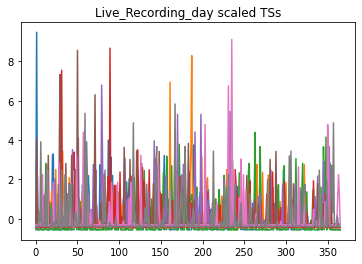

In [153]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [154]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         357       358       359       360       361  \
track_date_created                                                     
2009_live          -0.553669 -0.553669 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.473381 -0.338445 -0.473381   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           0.309469  4.878571 -0.411968 -0.411968 -0.411968   

                         362       363       364       365       366  
track_date_created                                                    
2009_live           0.152404 -0.553669 -0.553669 -0.553669 -0.553669  
2010_live          -0.338445 -0.473381 -0.473381 -0.473381 -0.473381  
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844  
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938  
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436  
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272  
2015_live          -0.311867  1.063354  2.242115  1.259814 -0.311867  
2016_live          -0.411968  0.068990 -0.411968 -0.411968 -0.411968  

[8 rows x 366 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  263.15018825249973 Silhouette Score:  0.04335418964024178

k:  3 SSE:  207.43298814644686 Silhouette Score:  0.05571924952976166

k:  4 SSE:  162.16174707761013 Silhouette Score:  0.04304531389161

k:  5 SSE:  117.60681582142252 Silhouette Score:  0.03240542186042715

k:  6 SSE:  77.38898384259747 Silhouette Score:  0.023028634160668103

k:  7 SSE:  38.04916068071605 Silhouette Score:  0.01630889757948253



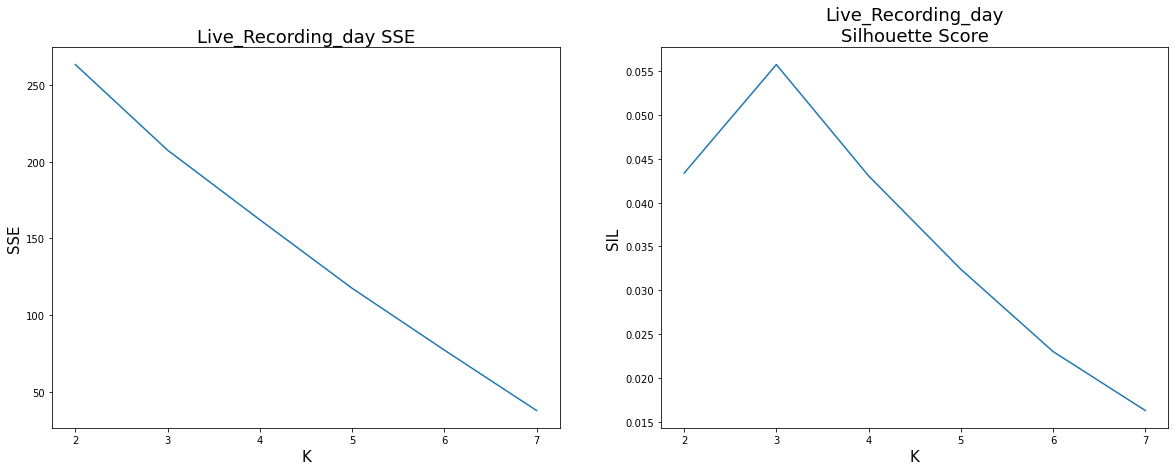

In [155]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [157]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(3, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 3, 1: 2, 2: 3}

SSE:  207.43298814644686
Silhouette Score:  0.05571924952976166


In [158]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_live          -0.553669 -0.553669 -0.553669 -0.553669       1  
2010_live          -0.473381 -0.473381 -0.473381 -0.473381       0  
2011_live          -0.570844 -0.570844 -0.570844 -0.570844       2  
2012_live          -0.436938 -0.436938 -0.436938 -0.436938       2  
2013_live          -0.372436 -0.372436 -0.372436 -0.372436       2  
2014_live          -0.278272 -0.278272 -0.278272 -0.278272       1  
2015_live           1.063354  2.242115  1.259814 -0.311867       0  
2016_live           0.068990 -0.411968 -0.411968 -0.411968       0  

[8 rows x 367 columns]

Cluster 0
 ['2010_live', '2015_live', '2016_live']

Cluster 1
 ['2009_live', '2014_live']

Cluster 2
 ['2011_live', '2012_live', '2013_live']



**Centroids**

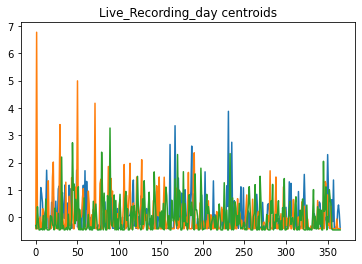

In [159]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

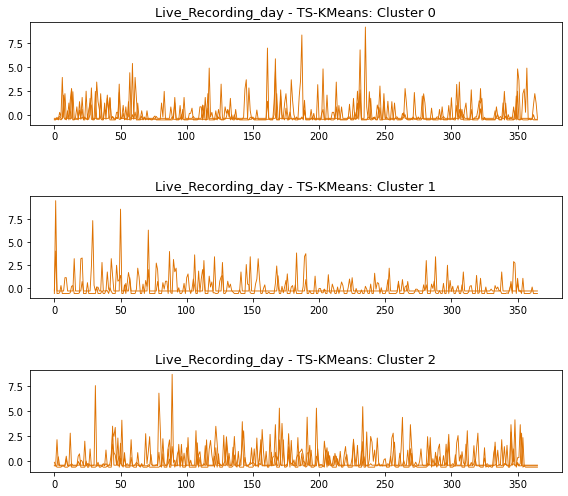

In [160]:
analyze_clusters(labels_live_eu, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>DTW distance</h3>

k:  2 SSE:  61.45250197534034 Silhouette Score:  0.12071219797915594

k:  3 SSE:  46.53874806791133 Silhouette Score:  0.10791300333814832

k:  4 SSE:  34.281164881589476 Silhouette Score:  0.08880803458429862

k:  5 SSE:  23.378379965902 Silhouette Score:  0.061463610707945746

k:  6 SSE:  13.222711136075901 Silhouette Score:  0.05333837963940716

k:  7 SSE:  6.319522632005009 Silhouette Score:  0.006470756960037709



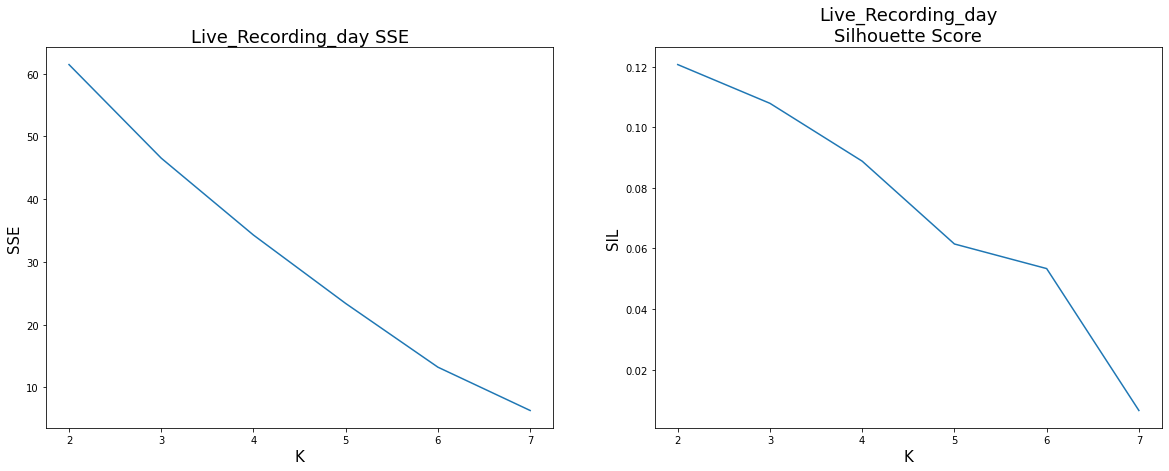

In [161]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [162]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 366, 1)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  46.53874806791133
Silhouette Score:  0.10791300333814832


In [163]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_live          -0.553669 -0.553669 -0.553669 -0.553669       1  
2010_live          -0.473381 -0.473381 -0.473381 -0.473381       0  
2011_live          -0.570844 -0.570844 -0.570844 -0.570844       2  
2012_live          -0.436938 -0.436938 -0.436938 -0.436938       1  
2013_live          -0.372436 -0.372436 -0.372436 -0.372436       0  
2014_live          -0.278272 -0.278272 -0.278272 -0.278272       0  
2015_live           1.063354  2.242115  1.259814 -0.311867       0  
2016_live           0.068990 -0.411968 -0.411968 -0.411968       0  

[8 rows x 367 columns]

Cluster 0
 ['2010_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2009_live', '2012_live']

Cluster 2
 ['2011_live']



**Centroids**

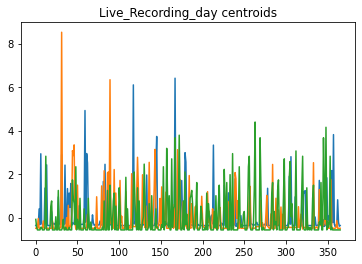

In [164]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

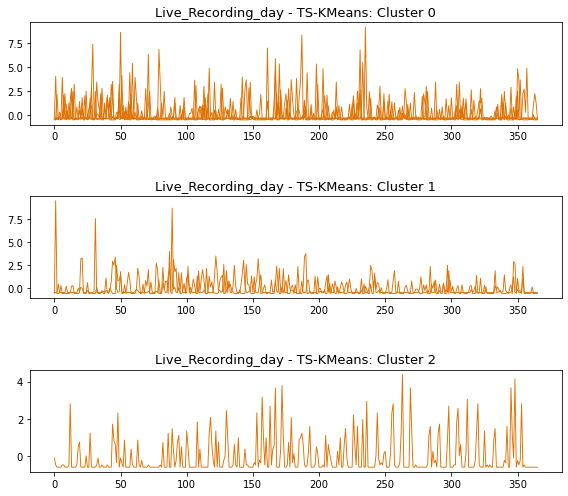

In [165]:
analyze_clusters(labels_live_dtw, tss_live_scaled, album_type, 'TS-KMeans', False)

<h3>KMeans sklearn</h3>

k:  2 SSE:  2105.2015060199988 Silhouette Score:  0.04335418964024157
Calinski-Harabaz:  1.3521939898393636 Davies-Bouldin:  2.0085565387774507

k:  3 SSE:  1659.4639051715744 Silhouette Score:  0.05571924952976179
Calinski-Harabaz:  1.3862575366773684 Davies-Bouldin:  1.603353791033327

k:  4 SSE:  1297.2939766208806 Silhouette Score:  0.04304531389161087
Calinski-Harabaz:  1.3179718088222816 Davies-Bouldin:  1.2339972683701337

k:  5 SSE:  940.8545265713805 Silhouette Score:  0.03240542186042772
Calinski-Harabaz:  1.3063553427814032 Davies-Bouldin:  0.9571201877213108

k:  6 SSE:  619.1118707407801 Silhouette Score:  0.023028634160668172
Calinski-Harabaz:  1.2666723836131522 Davies-Bouldin:  0.7368825394279618

k:  7 SSE:  304.3932854457288 Silhouette Score:  0.016308897579482916
Calinski-Harabaz:  1.2457832605984382 Davies-Bouldin:  0.5055499639148676



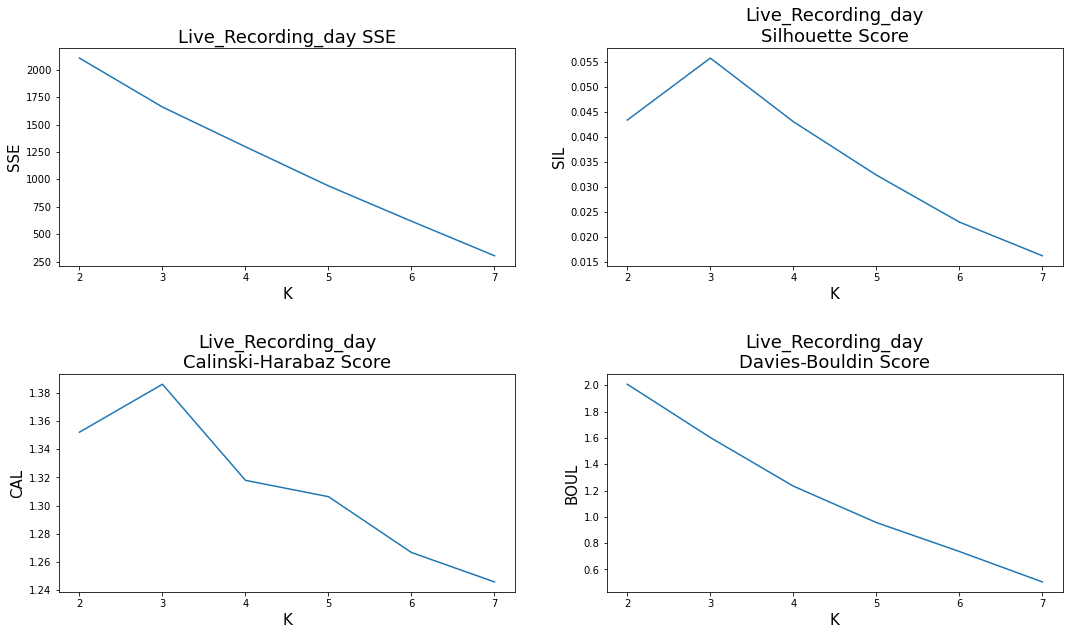

In [166]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [167]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(3, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (3, 366)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  1659.4639051715744
Silhouette Score:  0.05571924952976179
Calinski - Harabaz Score:  1.3862575366773684
Davies - Bouldin Score:  1.603353791033327


In [168]:
cluster_insight(df_tss_live_scaled, labels_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_live          -0.553669 -0.553669 -0.553669 -0.553669       0  
2010_live          -0.473381 -0.473381 -0.473381 -0.473381       1  
2011_live          -0.570844 -0.570844 -0.570844 -0.570844       2  
2012_live          -0.436938 -0.436938 -0.436938 -0.436938       2  
2013_live          -0.372436 -0.372436 -0.372436 -0.372436       2  
2014_live          -0.278272 -0.278272 -0.278272 -0.278272       0  
2015_live           1.063354  2.242115  1.259814 -0.311867       1  
2016_live           0.068990 -0.411968 -0.411968 -0.411968       1  

[8 rows x 367 columns]

Cluster 0
 ['2009_live', '2014_live']

Cluster 1
 ['2010_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live', '2012_live', '2013_live']



<h3>DBSCAN</h3>

In [169]:
dist = pdist(df_tss_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [172]:
k = 2
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

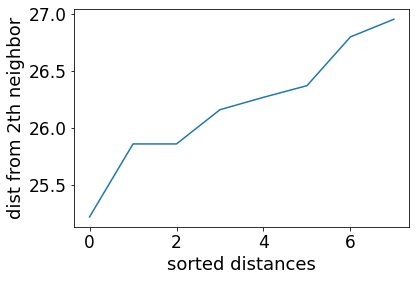

In [173]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [174]:
eps_to_test = np.arange(25.8, 26.4, 0.01)
min_samples_to_test = [2, 3, 4, 5]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [25.8  25.81 25.82 25.83 25.84 25.85 25.86 25.87 25.88 25.89 25.9  25.91
 25.92 25.93 25.94 25.95 25.96 25.97 25.98 25.99 26.   26.01 26.02 26.03
 26.04 26.05 26.06 26.07 26.08 26.09 26.1  26.11 26.12 26.13 26.14 26.15
 26.16 26.17 26.18 26.19 26.2  26.21 26.22 26.23 26.24 26.25 26.26 26.27
 26.28 26.29 26.3  26.31 26.32 26.33 26.34 26.35 26.36 26.37 26.38 26.39]
min_samples: [2, 3, 4, 5]


In [175]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [176]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 25.8 and min_samples =   2 | 27.236    3
  2 | Tested with eps = 25.8 and min_samples =   3 | 26.723    1
  3 | Tested with eps = 25.8 and min_samples =   4 | 26.654    0
  4 | Tested with eps = 25.8 and min_samples =   5 | 26.654    0
  5 | Tested with eps = 25.810000000000002 and min_samples =   2 | 27.236    3
  6 | Tested with eps = 25.810000000000002 and min_samples =   3 | 26.723    1
  7 | Tested with eps = 25.810000000000002 and min_samples =   4 | 26.654    0
  8 | Tested with eps = 25.810000000000002 and min_samples =   5 | 26.654    0
  9 | Tested with eps = 25.820000000000004 and min_samples =   2 | 27.236    3
 10 | Tested with eps = 25.820000000000004 and min_samples =   3 | 26.723    1
 11 | Tested with eps = 25.820000000000004 and min_samples =   4 | 26.654    0
 12 | Tested with eps = 25.820000000000004 and min_samp

120 | Tested with eps = 26.090000000000046 and min_samples =   5 | 26.654    0
121 | Tested with eps = 26.100000000000048 and min_samples =   2 | 27.236    2
122 | Tested with eps = 26.100000000000048 and min_samples =   3 | 26.774    1
123 | Tested with eps = 26.100000000000048 and min_samples =   4 | 26.654    0
124 | Tested with eps = 26.100000000000048 and min_samples =   5 | 26.654    0
125 | Tested with eps = 26.11000000000005 and min_samples =   2 | 27.236    2
126 | Tested with eps = 26.11000000000005 and min_samples =   3 | 26.774    1
127 | Tested with eps = 26.11000000000005 and min_samples =   4 | 26.654    0
128 | Tested with eps = 26.11000000000005 and min_samples =   5 | 26.654    0
129 | Tested with eps = 26.12000000000005 and min_samples =   2 | 27.236    2
130 | Tested with eps = 26.12000000000005 and min_samples =   3 | 26.774    1
131 | Tested with eps = 26.12000000000005 and min_samples =   4 | 26.654    0
132 | Tested with eps = 26.12000000000005 and min_samples =

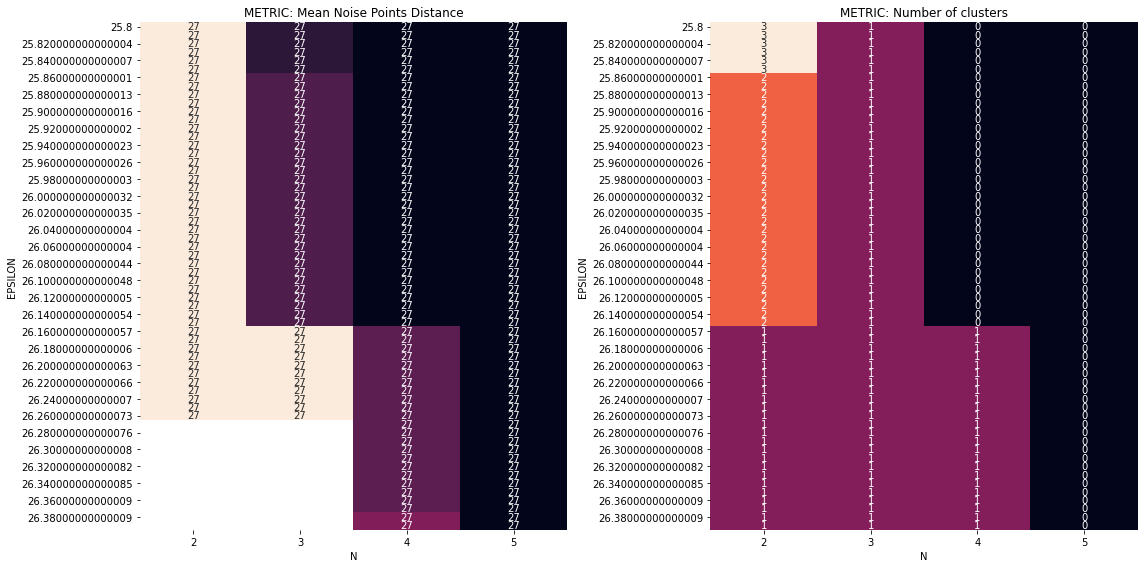

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [178]:
best_dbscan_model = DBSCAN(eps = 25.8, min_samples = 2)

# Fitting
best_dbscan_model.fit(df_tss_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=25.8, min_samples=2)

In [179]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([1, 2, 3, 2]))

In [180]:
cluster_insight(df_tss_live_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       365       366  Labels  
track_date_created                                                  
2009_live          -0.553669 -0.553669 -0.553669 -0.553669       0  
2010_live          -0.473381 -0.473381 -0.473381 -0.473381       1  
2011_live          -0.570844 -0.570844 -0.570844 -0.570844       2  
2012_live          -0.436938 -0.436938 -0.436938 -0.436938       2  
2013_live          -0.372436 -0.372436 -0.372436 -0.372436      -1  
2014_live          -0.278272 -0.278272 -0.278272 -0.278272       0  
2015_live           1.063354  2.242115  1.259814 -0.311867       1  
2016_live           0.068990 -0.411968 -0.411968 -0.411968       1  

[8 rows x 367 columns]

Cluster -1
 ['2013_live']

Cluster 0
 ['2009_live', '2014_live']

Cluster 1
 ['2010_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live', '2012_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [181]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_live_scaled.values)

In [182]:
model_single.n_clusters_

8

In [183]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 7, 1: 1}

Silhouette Score 0.01870719426891128
Separation Score 0.8335977983999607
Variance Ratio Criterion Score 1.079060885517235

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 5, 1: 1, 2: 2}

Silhouette Score 0.02405530689659992
Separation Score 1.3689176024971463
Variance Ratio Criterion Score 1.199935326289668

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 2, 1: 2, 2: 3, 3: 1}

Silhouette Score 0.04304531389161087
Separation Score 1.233997268370134
Variance Ratio Criterion Score 1.3179718088222816

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 3, 1: 2, 2: 1, 3: 1, 4: 1}

Silhouette Score 0.027385021294664233
Separation Score 0.9519914925455282
Variance Ratio Criterion Score 1.233218300527571

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.02302863416066

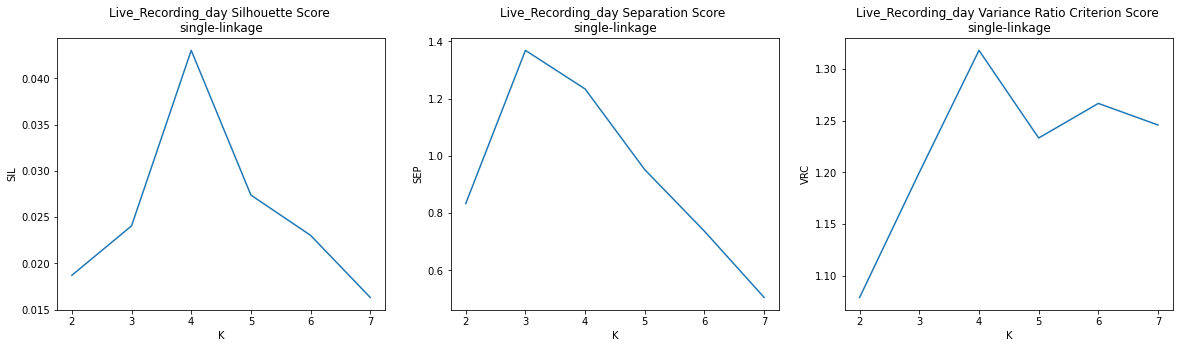

In [184]:
interpret_dendrogram(7, 'single', df_tss_live_scaled.values)

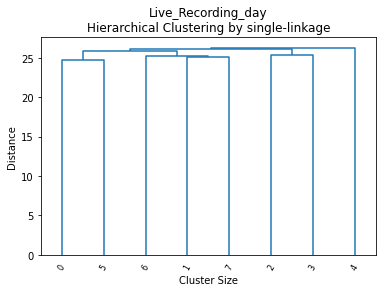

In [186]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

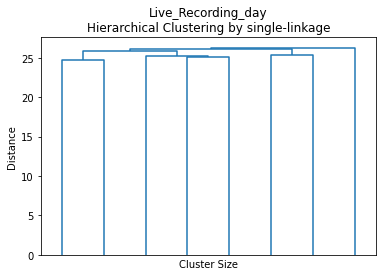

In [187]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [188]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_live_scaled.values)

In [189]:
model_complete.n_clusters_

8

In [190]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.04335418964024157
Separation Score 2.0085565387774507
Variance Ratio Criterion Score 1.3521939898393636

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 3, 2: 2}

Silhouette Score 0.046269895172370554
Separation Score 1.5950934272261736
Variance Ratio Criterion Score 1.3615790984068683

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.039965224711252065
Separation Score 1.2324499859749025
Variance Ratio Criterion Score 1.3063118226589339

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.03240542186042772
Separation Score 0.9571201877213109
Variance Ratio Criterion Score 1.3063553427814032

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.023028634

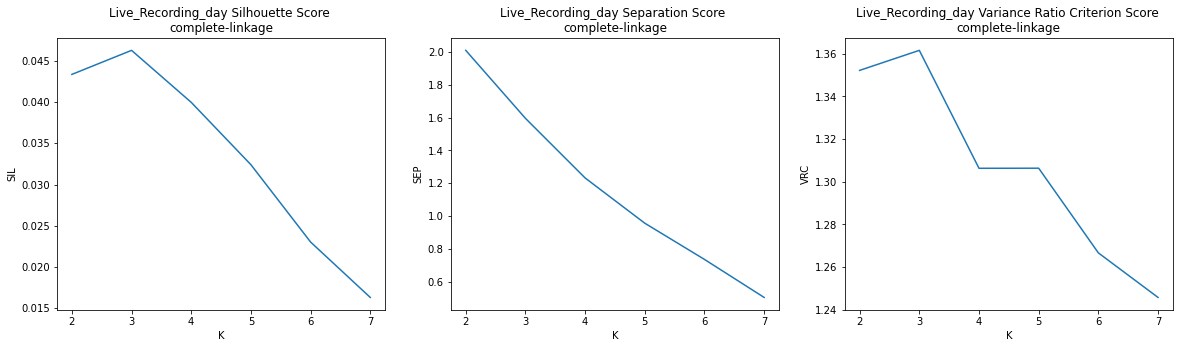

In [191]:
interpret_dendrogram(7, 'complete', df_tss_live_scaled.values)

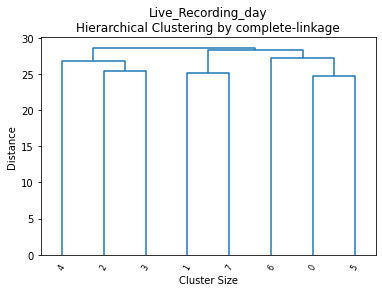

In [192]:
cut_distance = ""
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

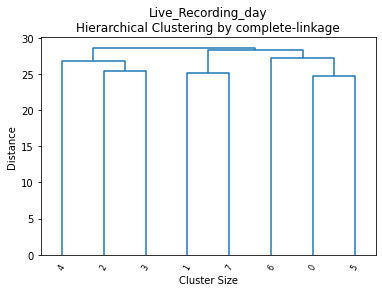

In [193]:
cut_distance = ""
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [194]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                            linkage='average').fit(df_tss_live_scaled.values)

In [195]:
model_average.n_clusters_

8

In [196]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.04335418964024157
Separation Score 2.0085565387774507
Variance Ratio Criterion Score 1.3521939898393636

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 3, 2: 2}

Silhouette Score 0.05571924952976179
Separation Score 1.6033537910333269
Variance Ratio Criterion Score 1.3862575366773684

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.04304531389161087
Separation Score 1.233997268370134
Variance Ratio Criterion Score 1.3179718088222816

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.03240542186042772
Separation Score 0.9571201877213108
Variance Ratio Criterion Score 1.3063553427814032

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.023028634160

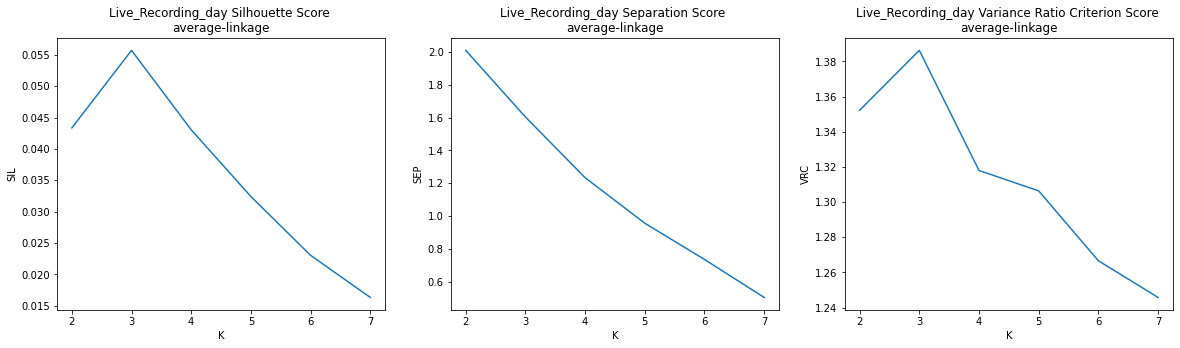

In [197]:
interpret_dendrogram(7, 'average', df_tss_live_scaled.values)

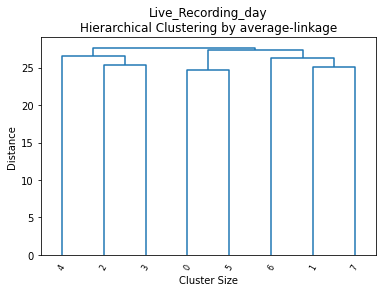

In [199]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

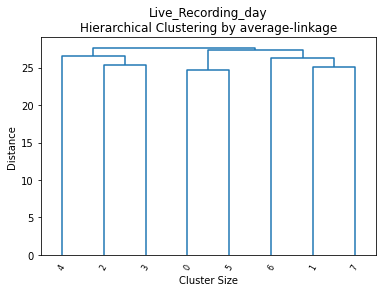

In [200]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [201]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                        linkage='ward').fit(df_tss_live_scaled.values)

In [202]:
model_ward.n_clusters_

8

In [203]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}


Cluster numbers:  2
Cluster {0: 5, 1: 3}

Silhouette Score 0.04335418964024157
Separation Score 2.0085565387774507
Variance Ratio Criterion Score 1.3521939898393636

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 3, 1: 3, 2: 2}

Silhouette Score 0.05571924952976179
Separation Score 1.6033537910333269
Variance Ratio Criterion Score 1.3862575366773684

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 2, 2: 2, 3: 1}

Silhouette Score 0.04304531389161087
Separation Score 1.233997268370134
Variance Ratio Criterion Score 1.3179718088222816

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 2, 1: 2, 2: 2, 3: 1, 4: 1}

Silhouette Score 0.03240542186042772
Separation Score 0.9571201877213108
Variance Ratio Criterion Score 1.3063553427814032

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

Silhouette Score 0.023028634160

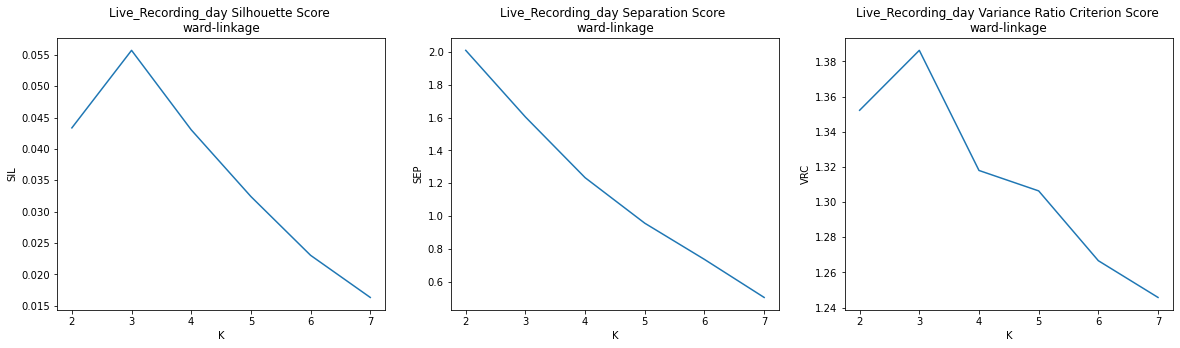

In [204]:
interpret_dendrogram(7, 'ward', df_tss_live_scaled.values)

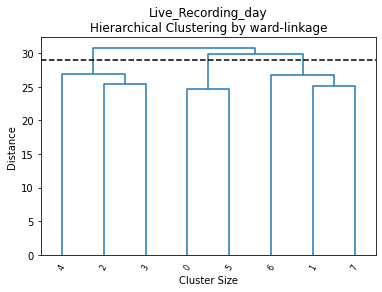

In [207]:
cut_distance = 29
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

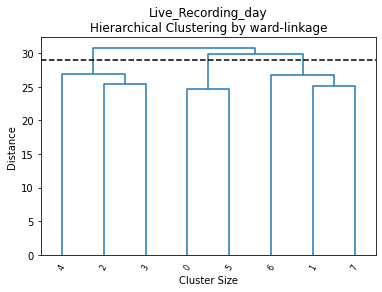

In [208]:
cut_distance = 29
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [209]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  112.1900974400372 Silhouette Score:  0.6150668785399793
Calinski-Harabaz:  23.561431272584727 Davies-Bouldin:  0.440220048835746

k:  3 SSE:  59.084832614992735 Silhouette Score:  0.49322235665717407
Calinski-Harabaz:  20.887980948717313 Davies-Bouldin:  0.35690880179645906

k:  4 SSE:  19.047923301944753 Silhouette Score:  0.5168482220210289
Calinski-Harabaz:  37.35854693525258 Davies-Bouldin:  0.33457414124457346

k:  5 SSE:  8.76041150562571 Silhouette Score:  0.4009391299292413
Calinski-Harabaz:  46.572261243214335 Davies-Bouldin:  0.21080647148135467

k:  6 SSE:  0.4781907546724271 Silhouette Score:  0.41210896963988763
Calinski-Harabaz:  461.9677646814301 Davies-Bouldin:  0.08384069142307253

k:  7 SSE:  0.15690493464193175 Silhouette Score:  0.21670720091874926
Calinski-Harabaz:  586.9722667310788 Davies-Bouldin:  0.038656527309367736



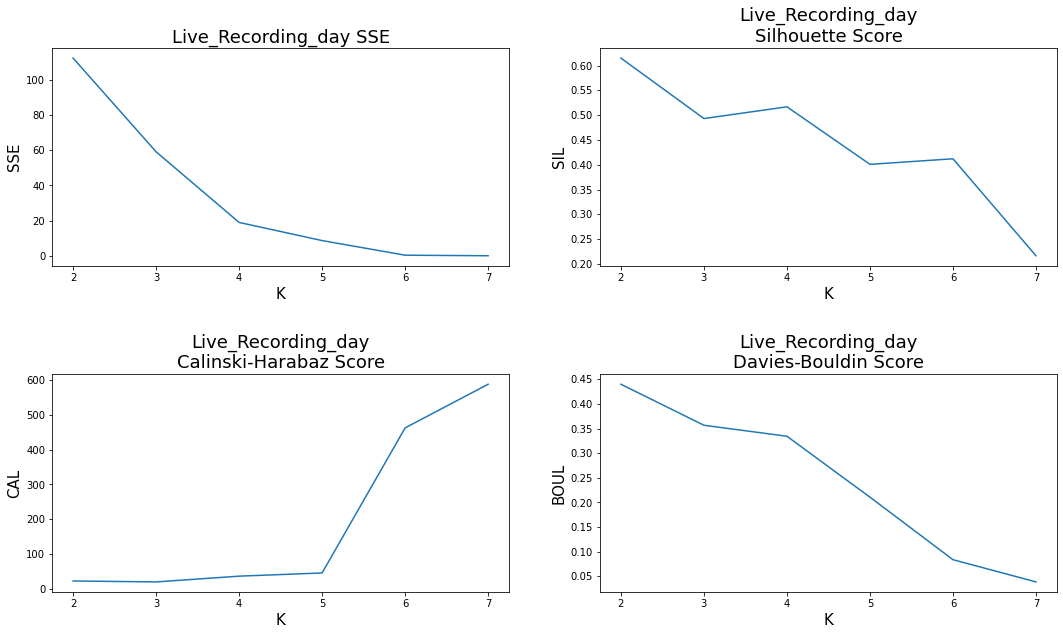

In [210]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [211]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(4, 300, 10, "", F, True)

cluster_centers_shape (4, 5)

Labels:  {0: 3, 1: 1, 2: 2, 3: 2}

SSE:  19.047923301944753
Silhouette Score:  0.5168482220210289
Calinski - Harabaz Score:  37.35854693525258
Davies - Bouldin Score:  0.3345741412445735


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

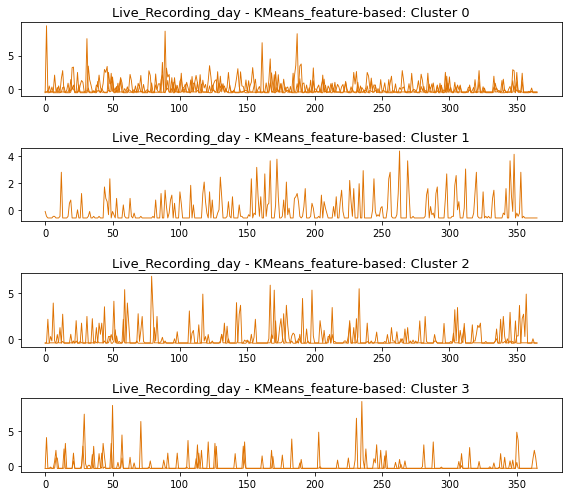

In [212]:
analyze_clusters(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

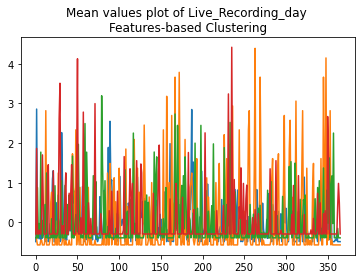

In [213]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [214]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [215]:
print(tss_live_scaled.shape, M.shape)

(8, 366, 1) (8, 8)


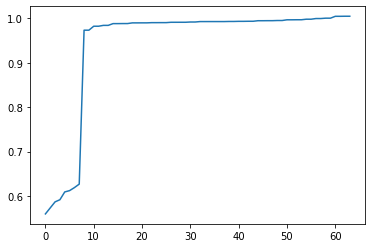

In [216]:
plt.plot(sorted(M.ravel()))
plt.show()

In [217]:
dbscan_compression_live = DBSCAN(eps=0.97, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.97, metric='precomputed')

In [218]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [219]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

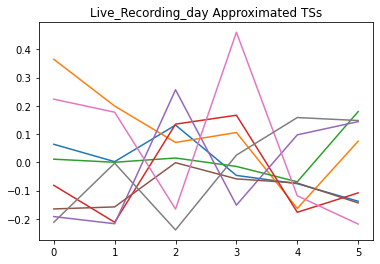

In [220]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  0.09444599942666093 Silhouette Score:  0.13594480285438676

k:  3 SSE:  0.06714163532612108 Silhouette Score:  0.14795151603127116

k:  4 SSE:  0.04411342469047608 Silhouette Score:  0.1493276037217277

k:  5 SSE:  0.027018331623837745 Silhouette Score:  0.12357454108861061

k:  6 SSE:  0.01310491368850851 Silhouette Score:  0.12731716691720596

k:  7 SSE:  0.005095106631651415 Silhouette Score:  0.06315414219785632



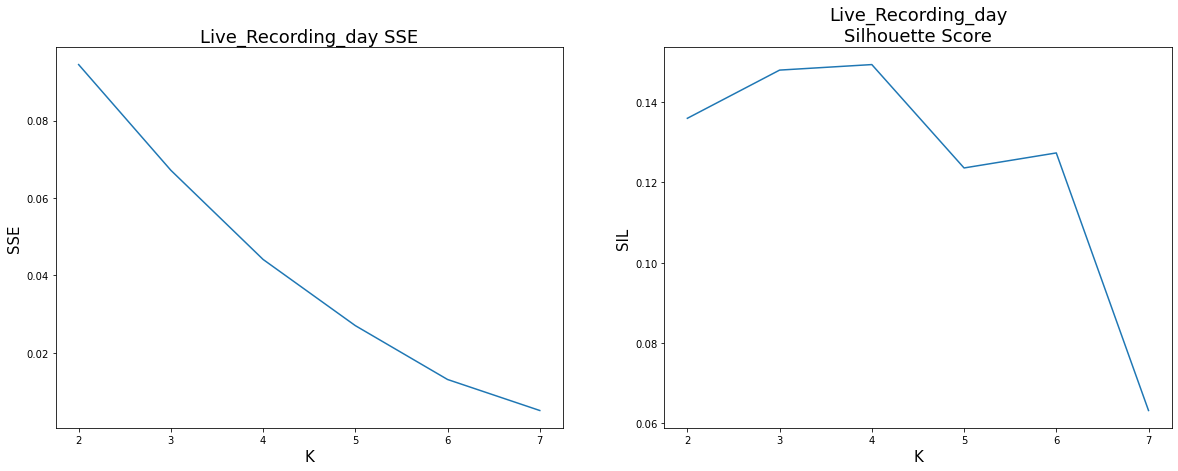

In [221]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [222]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(4, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 1, 1: 3, 2: 2, 3: 2}

SSE:  0.04411342469047608
Silhouette Score:  0.1493276037217277


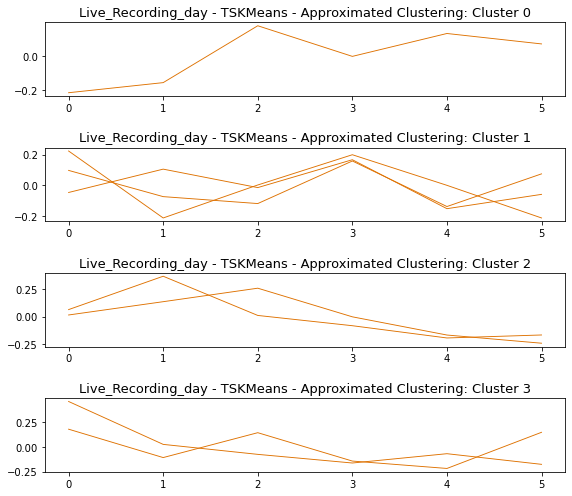

In [223]:
analyze_clusters(labels_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', False)

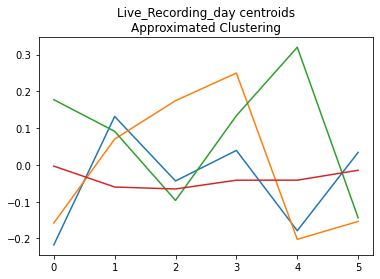

In [224]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type)

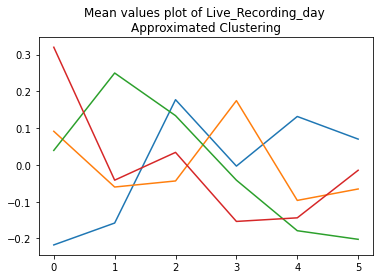

In [225]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [226]:
album_type = "Studio_Recording_day - Live_Recording_day"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [227]:
df_studio_live

1    2    3   4   5   6    7   8   9  10  ...  357  358  \
track_date_created                                             ...             
2009_studio          0    2    0   0   0   1    0   0  33   0  ...    8    0   
2010_studio         10   21   13  13   4  19   41  34  62  10  ...   55   63   
2011_studio         12   23   85  77  51  29   58  10  35  54  ...  110   21   
2012_studio          9   67   50  46  14   0    5   9  29  77  ...   47   10   
2013_studio         28   33  188  61   6  10  117  85  91  89  ...   16    9   
2014_studio          9   41   57  17  35  40   46  31  13  63  ...   11   25   
2015_studio         50   38   29  33  21   7   32   4  36  22  ...   30   12   
2016_studio         41    6   22  68  99  48   41  73  81  24  ...   53   48   
2009_live            0  128    0   0   1  11    0   0   0   0  ...    0    0   
2010_live            0    0    2   0   1   0    1  19   2   0  ...    0    0   
2011_live            4    1    0   0   0   0    1   1   0   0  ...    0    0   
2012_live            0    0    0   8   0   0    0   0   0   6  ...    0    0   
2013_live            0    0   17   0   0   0    0   0   0   6  ...    0    0   
2014_live            0   21    0   0   0   0    0   0   7   7  ...    0    0   
2015_live            0    0    0   0   1   0    0   5  13   0  ...    0    0   
2016_live            0    0    0   0   3   1   18   1   0   0  ...    3   22   

                    359  360  361  362  363  364  365  366  
track_date_created                                          
2009_studio          20    5    2   78   25    3    3    0  
2010_studio           1   23    1   26   51   65    3    0  
2011_studio           0    2    9   27   38   20    2    0  
2012_studio          20   40   22   55   42   15   41   21  
2013_studio           0    6    6    7    0   80   42    0  
2014_studio          12    0   17   23   12   17   24    0  
2015_studio           8    2    1   15   10   30   44    0  
2016_studio          11   47    4   42   31   21   86  176  
2009_live             0    0    1    9    0    0    0    0  
2010_live             0    1    0    1    0    0    0    0  
2011_live             0    0    0    0    0    0    0    0  
2012_live             0    0    0    0    0    0    0    0  
2013_live             0    0    0    0    0    0    0    0  
2014_live             0    0    0    0    0    0    0    0  
2015_live             0    0    0    0    7   13    8    0  
2016_live             0    0    0    0    2    0    0    0  

[16 rows x 366 columns]

In [228]:
df_studio_live.shape

(16, 366)

In [229]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[ 0.],
        [ 2.],
        [ 0.],
        ...,
        [ 3.],
        [ 3.],
        [ 0.]],

       [[10.],
        [21.],
        [13.],
        ...,
        [65.],
        [ 3.],
        [ 0.]],

       [[12.],
        [23.],
        [85.],
        ...,
        [20.],
        [ 2.],
        [ 0.]],

       ...,

       [[ 0.],
        [21.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [13.],
        [ 8.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]])

In [230]:
tss_studio_live.shape

(16, 366, 1)

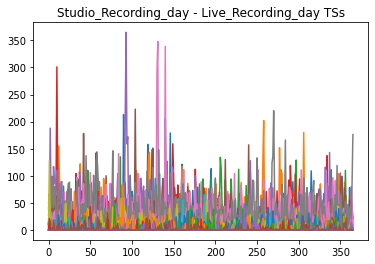

In [231]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [232]:
tss_studio_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[-0.73249705],
        [-0.66763038],
        [-0.73249705],
        ...,
        [-0.63519705],
        [-0.63519705],
        [-0.73249705]],

       [[-0.693914  ],
        [-0.3371199 ],
        [-0.59660652],
        ...,
        [ 1.09005647],
        [-0.92096479],
        [-1.01827227]],

       [[-0.54969667],
        [-0.1182973 ],
        [ 2.31322646],
        ...,
        [-0.23595167],
        [-0.94187792],
        [-1.02031417]],

       ...,

       [[-0.27827153],
        [ 4.0425264 ],
        [-0.27827153],
        ...,
        [-0.27827153],
        [-0.27827153],
        [-0.27827153]],

       [[-0.31186708],
        [-0.31186708],
        [-0.31186708],
        ...,
        [ 2.24211496],
        [ 1.25981418],
        [-0.31186708]],

       [[-0.41196818],
        [-0.41196818],
        [-0.41196818],
        ...,
        [-0.41196818],
        [-0.41196818],
        [-0.41196818]]])

In [233]:
tss_studio_live_scaled.shape

(16, 366, 1)

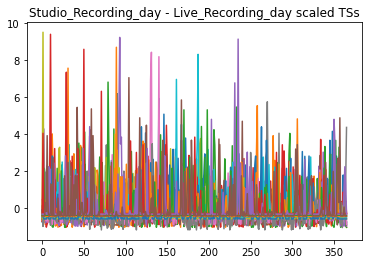

In [234]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [235]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         357       358       359       360       361  \
track_date_created                                                     
2009_studio        -0.473030 -0.732497 -0.083830 -0.570330 -0.667630   
2010_studio         0.765698  1.025185 -0.985836 -0.272248 -0.985836   
2011_studio         3.293680 -0.196734 -1.020314 -0.941878 -0.667351   
2012_studio         0.609011 -0.668242 -0.323039  0.367368 -0.253998   
2013_studio        -0.511510 -0.706524 -0.957255 -0.790101 -0.790101   
2014_studio        -0.500065 -0.002041 -0.464492 -0.891369 -0.286626   
2015_studio        -0.068697 -0.548631 -0.655283 -0.815261 -0.841924   
2016_studio         0.500328  0.343439 -0.817533  0.312062 -1.037177   
2009_live          -0.553669 -0.553669 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.473381 -0.338445 -0.473381   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           0.309469  4.878571 -0.411968 -0.411968 -0.411968   

                         362       363       3

<h3>Euclidean Distance</h3>

k:  2 SSE:  310.999081299587 Silhouette Score:  0.02779575614235491

k:  3 SSE:  283.0629883606862 Silhouette Score:  0.029004534391193604

k:  4 SSE:  255.038979152784 Silhouette Score:  0.032701849127299266

k:  5 SSE:  230.17441210930158 Silhouette Score:  0.03249495399768794

k:  6 SSE:  206.69731920706937 Silhouette Score:  0.02934231055565613

k:  7 SSE:  183.63358790497193 Silhouette Score:  0.0335508000848745

k:  8 SSE:  160.08169553318126 Silhouette Score:  0.03729261974326725

k:  9 SSE:  137.5780723521592 Silhouette Score:  0.035199558432756115

k:  10 SSE:  115.91795257577726 Silhouette Score:  0.03258090277830178

k:  11 SSE:  95.80903658636474 Silhouette Score:  0.028286799168322024

k:  12 SSE:  75.8679097751774 Silhouette Score:  0.02163692947585381

k:  13 SSE:  56.17695162098728 Silhouette Score:  0.01671277992938695

k:  14 SSE:  36.79919754120208 Silhouette Score:  0.015962352348077434

k:  15 SSE:  17.77461720084406 Silhouette Score:  0.010402480208665129



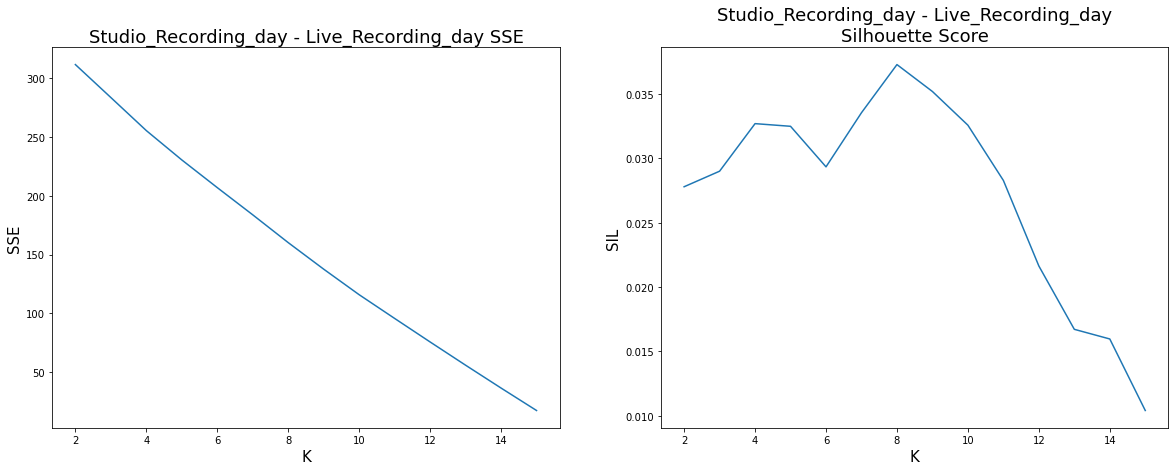

In [236]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 8**

In [237]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(8, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (8, 366, 1)

Labels:  {0: 4, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 1, 7: 2}

SSE:  160.08169553318126
Silhouette Score:  0.03729261974326725


In [238]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       3

Cluster 0
 ['2010_studio', '2010_live', '2015_live', '2016_live']

Cluster 1
 ['2009_live', '2014_live']

Cluster 2
 ['2009_studio', '2015_studio']

Cluster 3
 ['2011_live', '2012_live']

Cluster 4
 ['2014_studio']

Cluster 5
 ['2011_studio', '2013_live']

Cluster 6
 ['2016_studio']

Cluster 7
 ['2012_studio', '2013_studio']



**Centroids**

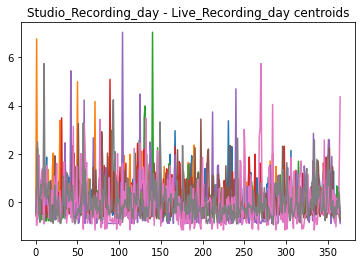

In [239]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

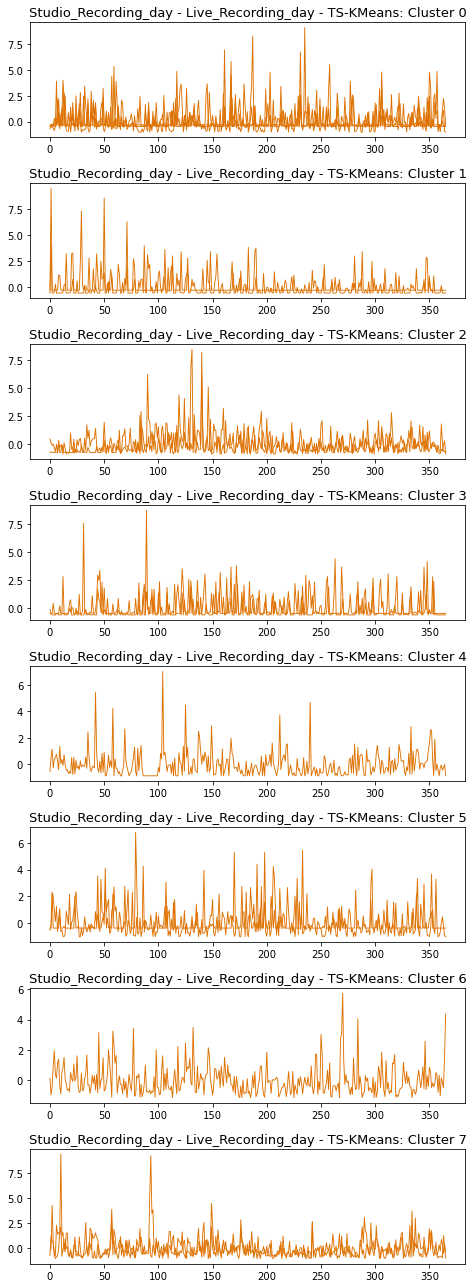

In [240]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>DTW distance</h3>

k:  2 SSE:  88.07879438986097 Silhouette Score:  0.058715103502077155

k:  3 SSE:  77.06981394770033 Silhouette Score:  0.062181410260009146

k:  4 SSE:  66.65781928692076 Silhouette Score:  0.07168483970189306

k:  5 SSE:  58.391865658709634 Silhouette Score:  0.0631096114818728

k:  6 SSE:  51.99308042867313 Silhouette Score:  0.04032222552008862

k:  7 SSE:  45.26226319932899 Silhouette Score:  0.04071095221631969

k:  8 SSE:  39.15945393959523 Silhouette Score:  0.04655149767951497

k:  9 SSE:  32.43107823733637 Silhouette Score:  0.04416916855629789

k:  10 SSE:  26.160939836661402 Silhouette Score:  0.04829605971241745

k:  11 SSE:  20.549914818071592 Silhouette Score:  0.03433864366439918

k:  12 SSE:  15.749489508428525 Silhouette Score:  0.02946371957556538

k:  13 SSE:  10.878007035834226 Silhouette Score:  0.02609672894468824

k:  14 SSE:  6.6113555680379505 Silhouette Score:  0.022349436101099254

k:  15 SSE:  3.1597613160025046 Silhouette Score:  0.0032353784800188547



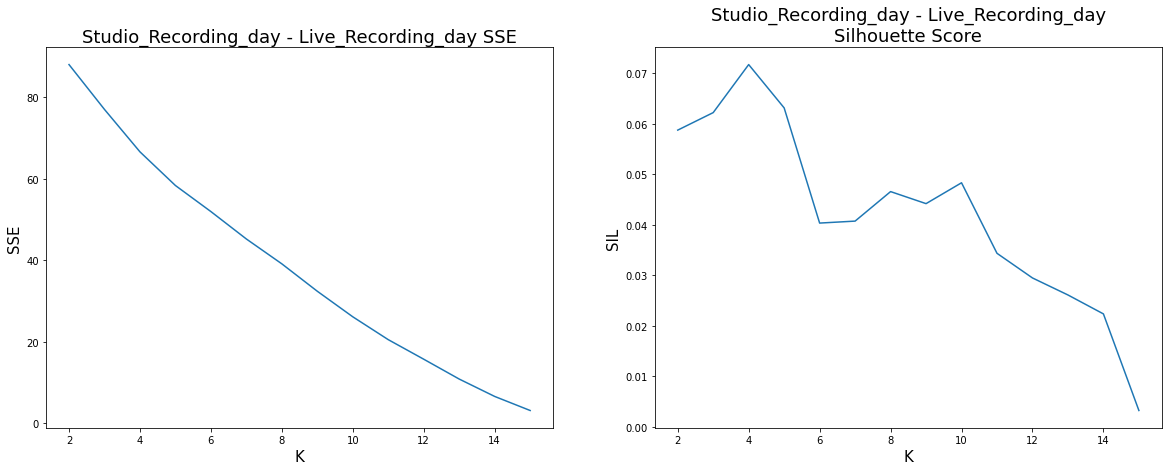

In [241]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 4**

In [242]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, labels_studio_live_dtw = run_kmeans(4, 1000, 10, 'dtw',\
                                                                    tss_studio_live_scaled, False)

cluster_centers_shape (4, 366, 1)

Labels:  {0: 3, 1: 3, 2: 4, 3: 6}

SSE:  65.55920978210845
Silhouette Score:  0.07168483970189306


In [243]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       3

Cluster 0
 ['2012_studio', '2009_live', '2012_live']

Cluster 1
 ['2010_studio', '2011_studio', '2016_studio']

Cluster 2
 ['2009_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 3
 ['2010_live', '2011_live', '2013_live', '2014_live', '2015_live', '2016_live']



**Centroids**

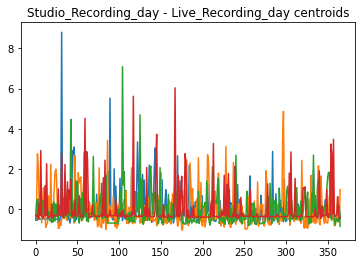

In [244]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

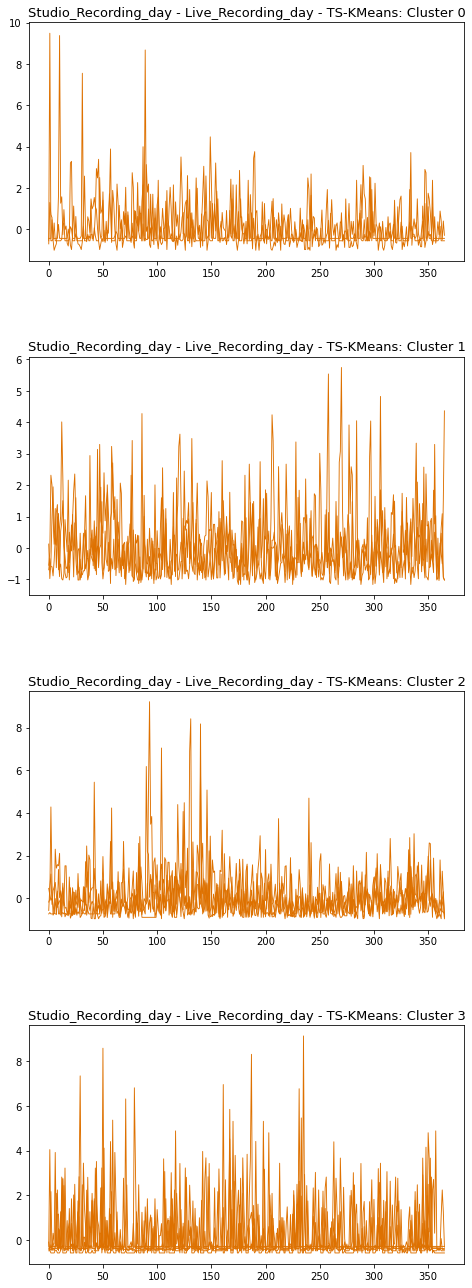

In [245]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, album_type, 'TS-KMeans', True)

<h3>KMeans sklearn</h3>

k:  2 SSE:  4989.306405543243 Silhouette Score:  0.025510425808534833
Calinski-Harabaz:  1.4153357372321964 Davies-Bouldin:  3.116143782056288

k:  3 SSE:  4507.640689131214 Silhouette Score:  0.030338692154518267
Calinski-Harabaz:  1.4218970500836743 Davies-Bouldin:  2.488080514428175

k:  4 SSE:  4110.861123629789 Silhouette Score:  0.025838479385378338
Calinski-Harabaz:  1.3455489893952666 Davies-Bouldin:  2.1936366013153026

k:  5 SSE:  3682.790593748824 Silhouette Score:  0.03249495399768819
Calinski-Harabaz:  1.3522374647247708 Davies-Bouldin:  1.9125497459573821

k:  6 SSE:  3299.261126388484 Silhouette Score:  0.035521222563438114
Calinski-Harabaz:  1.3302622440525185 Davies-Bouldin:  1.7523626334234699

k:  7 SSE:  2941.547987586697 Silhouette Score:  0.03493606930964838
Calinski-Harabaz:  1.3014343490693903 Davies-Bouldin:  1.4671270729541706

k:  8 SSE:  2546.7973620041184 Silhouette Score:  0.038241714169997165
Calinski-Harabaz:  1.3224025989669015 Davies-Bouldin:  1.337541

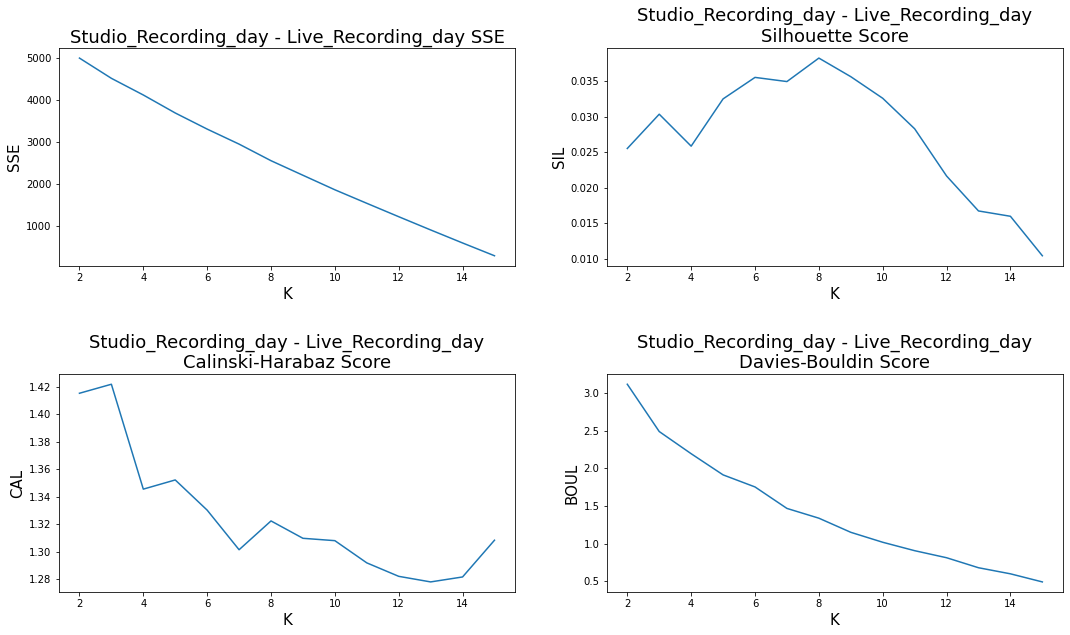

In [246]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [247]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(8, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (8, 366)

Labels:  {0: 1, 1: 2, 2: 3, 3: 2, 4: 2, 5: 3, 6: 2, 7: 1}

SSE:  2563.419086185241
Silhouette Score:  0.03508631152892559
Calinski - Harabaz Score:  1.306417359688526
Davies - Bouldin Score:  1.311004367950823


In [248]:
cluster_insight(df_tss_studio_live_scaled, labels_studio_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       3

Cluster 0
 ['2014_studio']

Cluster 1
 ['2009_studio', '2015_studio']

Cluster 2
 ['2011_live', '2012_live', '2013_live']

Cluster 3
 ['2012_studio', '2013_studio']

Cluster 4
 ['2016_studio', '2015_live']

Cluster 5
 ['2010_studio', '2010_live', '2016_live']

Cluster 6
 ['2009_live', '2014_live']

Cluster 7
 ['2011_studio']



<h3>DBSCAN</h3>

In [249]:
dist = pdist(df_tss_studio_live_scaled, 'euclidean') #pair wise distance
#print (dist)
dist = squareform(dist) #distance matrix given the vector dist
#print()
#print(dist)

In [258]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

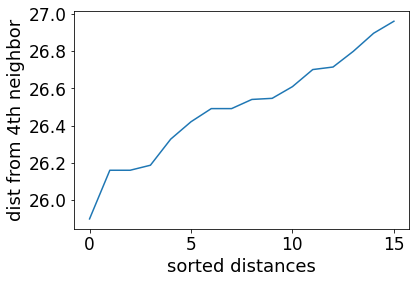

In [259]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(labelsize=17)
plt.show()

In [260]:
eps_to_test = np.arange(26.1, 26.3, 0.01)
min_samples_to_test = [2, 3, 4, 5, 6, 7, 8]

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [26.1  26.11 26.12 26.13 26.14 26.15 26.16 26.17 26.18 26.19 26.2  26.21
 26.22 26.23 26.24 26.25 26.26 26.27 26.28 26.29]
min_samples: [2, 3, 4, 5, 6, 7, 8]


In [261]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

In [262]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_tss_studio_live_scaled, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 26.1 and min_samples =   2 | 26.477    1
  2 | Tested with eps = 26.1 and min_samples =   3 | 26.477    1
  3 | Tested with eps = 26.1 and min_samples =   4 | 26.244    2
  4 | Tested with eps = 26.1 and min_samples =   5 | 26.167    1
  5 | Tested with eps = 26.1 and min_samples =   6 | 26.073    0
  6 | Tested with eps = 26.1 and min_samples =   7 | 26.073    0
  7 | Tested with eps = 26.1 and min_samples =   8 | 26.073    0
  8 | Tested with eps = 26.110000000000003 and min_samples =   2 | 26.487    1
  9 | Tested with eps = 26.110000000000003 and min_samples =   3 | 26.487    1
 10 | Tested with eps = 26.110000000000003 and min_samples =   4 | 26.157    2
 11 | Tested with eps = 26.110000000000003 and min_samples =   5 | 26.167    1
 12 | Tested with eps = 26.110000000000003 and min_samples =   6 | 26.073    0
 13 | Tested with 

110 | Tested with eps = 26.250000000000025 and min_samples =   6 | 26.18    1
111 | Tested with eps = 26.250000000000025 and min_samples =   7 | 26.073    0
112 | Tested with eps = 26.250000000000025 and min_samples =   8 | 26.073    0
113 | Tested with eps = 26.260000000000026 and min_samples =   2 |  None    1
114 | Tested with eps = 26.260000000000026 and min_samples =   3 |  None    1
115 | Tested with eps = 26.260000000000026 and min_samples =   4 |  None    1
116 | Tested with eps = 26.260000000000026 and min_samples =   5 | 26.203    2
117 | Tested with eps = 26.260000000000026 and min_samples =   6 | 26.18    1
118 | Tested with eps = 26.260000000000026 and min_samples =   7 | 26.073    0
119 | Tested with eps = 26.260000000000026 and min_samples =   8 | 26.073    0
120 | Tested with eps = 26.270000000000028 and min_samples =   2 |  None    1
121 | Tested with eps = 26.270000000000028 and min_samples =   3 |  None    1
122 | Tested with eps = 26.270000000000028 and min_samples 

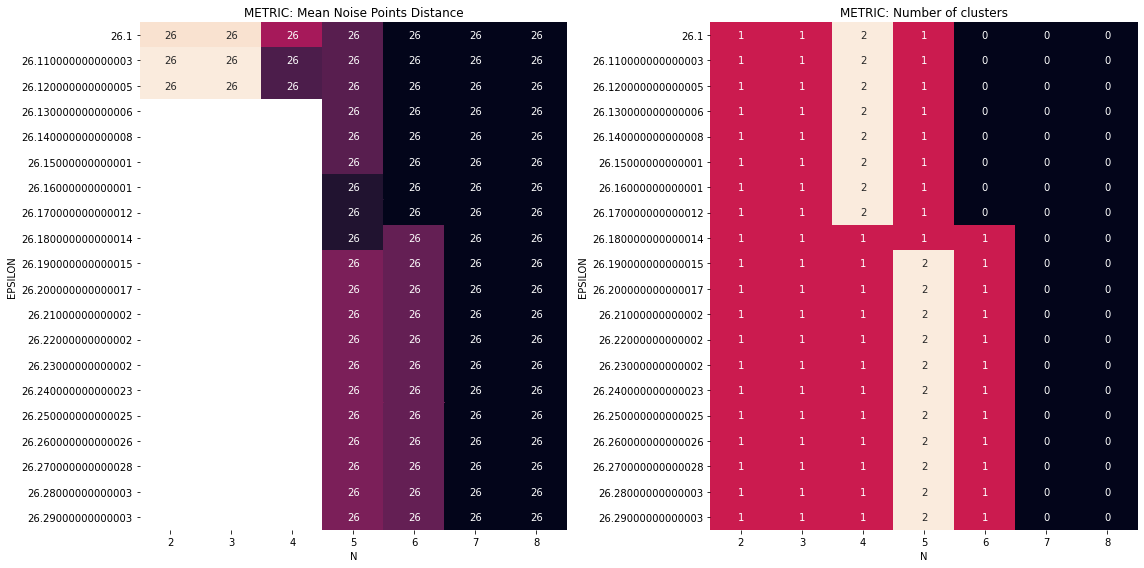

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [264]:
best_dbscan_model = DBSCAN(eps = 26.1, min_samples = 4)

# Fitting
best_dbscan_model.fit(df_tss_studio_live_scaled)

# Extracting labels
#df_tss_studio_scaled["LABEL"] = best_dbscan_model.labels_

DBSCAN(eps=26.1, min_samples=4)

In [265]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1]), array([7, 6, 3]))

In [266]:
cluster_insight(df_tss_studio_live_scaled, best_dbscan_model.labels_)

1         2         3         4         5  \
track_date_created                                                     
2009_studio        -0.732497 -0.667630 -0.732497 -0.732497 -0.732497   
2010_studio        -0.693914 -0.337120 -0.596607 -0.596607 -0.888529   
2011_studio        -0.549697 -0.118297  2.313226  1.999481  0.979810   
2012_studio        -0.702763  1.299417  0.712572  0.574490 -0.530161   
2013_studio        -0.177202 -0.037907  4.280247  0.742147 -0.790101   
2014_studio        -0.571211  0.567129  1.136299 -0.286626  0.353690   
2015_studio         0.464563  0.144607 -0.095360  0.011292 -0.308664   
2016_studio         0.123796 -0.974422 -0.472379  0.970992  1.943699   
2009_live          -0.553669  9.488254 -0.553669 -0.553669 -0.475217   
2010_live          -0.473381 -0.473381 -0.203509 -0.473381 -0.338445   
2011_live          -0.086652 -0.449796 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938  0.463382 -0.436938   
2013_live          -0.372436 -0.372436  2.168458 -0.372436 -0.372436   
2014_live          -0.278272  4.042526 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.115407   
2016_live          -0.411968 -0.411968 -0.411968 -0.411968  0.309469   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio        -0.700064 -0.732497 -0.732497  0.337803 -0.732497  ...   
2010_studio        -0.401992  0.311597  0.084546  0.992749 -0.693914  ...   
2011_studio         0.117011  1.254337 -0.628133  0.352320  1.097465  ...   
2012_studio        -1.013446 -0.840844 -0.702763 -0.012356  1.644621  ...   
2013_studio        -0.678665  2.302254  1.410764  1.577919  1.522200  ...   
2014_studio         0.531556  0.744995  0.211398 -0.428919  1.349738  ...   
2015_studio        -0.681946 -0.015371 -0.761935  0.091281 -0.282001  ...   
2016_studio         0.343439  0.123796  1.127881  1.378902 -0.409624  ...   
2009_live           0.309309 -0.553669 -0.553669 -0.553669 -0.553669  ...   
2010_live          -0.473381 -0.338445  2.090396 -0.203509 -0.473381  ...   
2011_live          -0.570844 -0.449796 -0.449796 -0.570844 -0.570844  ...   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938  0.238302  ...   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436  0.524350  ...   
2014_live          -0.278272 -0.278272 -0.278272  1.161994  1.161994  ...   
2015_live          -0.311867 -0.311867  0.670434  2.242115 -0.311867  ...   
2016_live          -0.171489  3.916654 -0.171489 -0.411968 -0.411968  ...   

                         358       359       360       361       362  \
track_date_created                                                     
2009_studio        -0.732497 -0.083830 -0.570330 -0.667630  1.797303   
2010_studio         1.025185 -0.985836 -0.272248 -0.985836 -0.174941   
2011_studio        -0.196734 -1.020314 -0.941878 -0.667351  0.038575   
2012_studio        -0.668242 -0.323039  0.367368 -0.253998  0.885173   
2013_studio        -0.706524 -0.957255 -0.790101 -0.790101 -0.762242   
2014_studio        -0.002041 -0.464492 -0.891369 -0.286626 -0.073187   
2015_studio        -0.548631 -0.655283 -0.815261 -0.841924 -0.468642   
2016_studio         0.343439 -0.817533  0.312062 -1.037177  0.155174   
2009_live          -0.553669 -0.553669 -0.553669 -0.475217  0.152404   
2010_live          -0.473381 -0.473381 -0.338445 -0.473381 -0.338445   
2011_live          -0.570844 -0.570844 -0.570844 -0.570844 -0.570844   
2012_live          -0.436938 -0.436938 -0.436938 -0.436938 -0.436938   
2013_live          -0.372436 -0.372436 -0.372436 -0.372436 -0.372436   
2014_live          -0.278272 -0.278272 -0.278272 -0.278272 -0.278272   
2015_live          -0.311867 -0.311867 -0.311867 -0.311867 -0.311867   
2016_live           4.878571 -0.411968 -0.411968 -0.411968 -0.411968   

                         363       364       3

Cluster -1
 ['2011_studio', '2012_studio', '2013_studio', '2014_studio', '2015_studio', '2012_live', '2013_live']

Cluster 0
 ['2010_studio', '2016_studio', '2010_live', '2011_live', '2015_live', '2016_live']

Cluster 1
 ['2009_studio', '2009_live', '2014_live']



<h3>Hierarchical Clustering</h3>

**Single**

In [267]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', \
                                       linkage='single').fit(df_tss_studio_live_scaled.values)

In [268]:
model_single.n_clusters_

16

In [269]:
hist, bins = np.histogram(model_single.labels_, bins=range(0, len(set(model_single.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 15, 1: 1}

Silhouette Score 0.020612808091428056
Separation Score 0.8960378512045621
Variance Ratio Criterion Score 1.0895563467762241

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 14, 1: 1, 2: 1}

Silhouette Score 0.0047679894509623805
Separation Score 0.8983031132413523
Variance Ratio Criterion Score 1.0750552252076369

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 3, 1: 11, 2: 1, 3: 1}

Silhouette Score 0.003047333030570962
Separation Score 1.6432505164426592
Variance Ratio Criterion Score 1.1372585792725125

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 11, 1: 2, 2: 1, 3: 1, 4: 1}

Silhouette Score 0.0017870305959327114
Separation Score 1.261633476767965
Variance Ratio Criterion Score 1.123063456424057

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 10, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1}

Silhouette Score -0.0

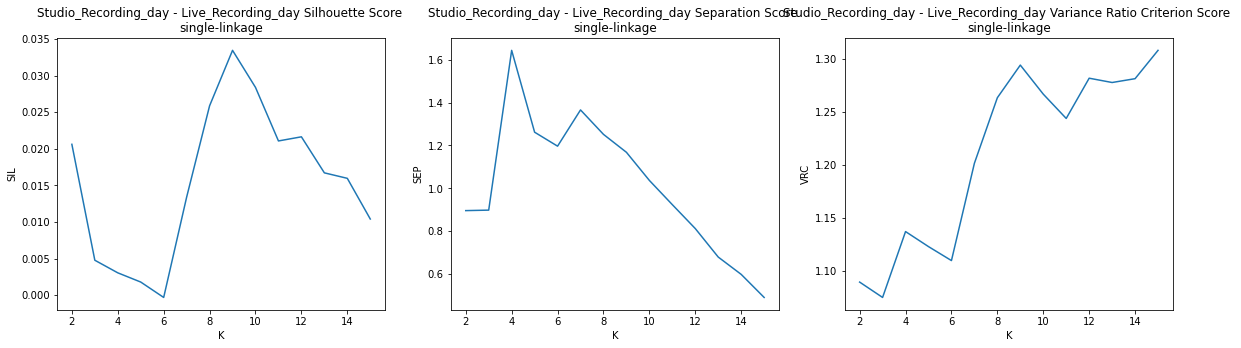

In [270]:
interpret_dendrogram(15, 'single', df_tss_studio_live_scaled.values)

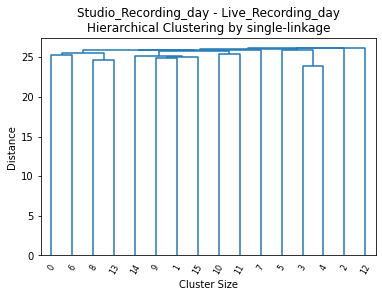

In [271]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='lastp', 
                p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

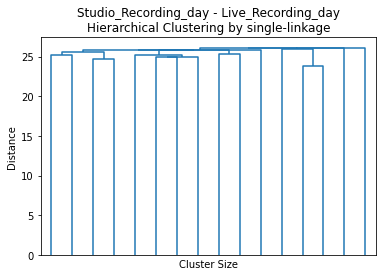

In [272]:
cut_distance = ""
plot_dendrogram(model_single, cut_distance, "single-linkage", album_type, truncate_mode='level', 
                p=30, no_labels=True, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Complete**

In [273]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='complete').fit(df_tss_studio_live_scaled.values)

In [274]:
model_complete.n_clusters_

16

In [275]:
hist, bins = np.histogram(model_complete.labels_, bins=range(0, len(set(model_complete.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 9, 1: 7}

Silhouette Score 0.023598609051780114
Separation Score 3.130975480577908
Variance Ratio Criterion Score 1.3984924999519217

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 7, 1: 5, 2: 4}

Silhouette Score 0.026478438793824517
Separation Score 2.564035554686661
Variance Ratio Criterion Score 1.4017225371646604

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 4, 2: 4, 3: 3}

Silhouette Score 0.024396026644094397
Separation Score 2.246835290033662
Variance Ratio Criterion Score 1.3463592891046172

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 4, 1: 3, 2: 4, 3: 3, 4: 2}

Silhouette Score 0.03363013706542831
Separation Score 1.9372847550821142
Variance Ratio Criterion Score 1.3561681515052328

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 2, 3: 3, 4: 2, 5: 2}

Silhouette Score 0.03716511482

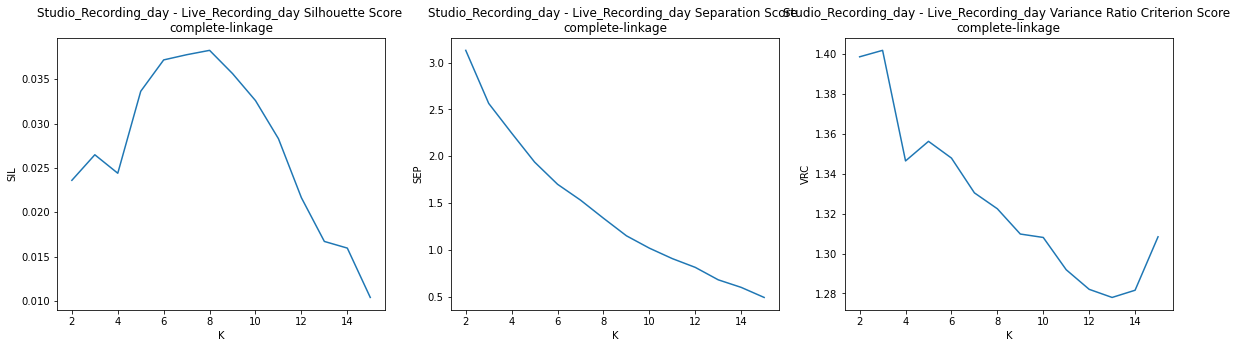

In [276]:
interpret_dendrogram(15, 'complete', df_tss_studio_live_scaled.values)

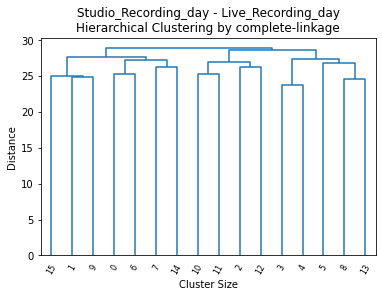

In [277]:
cut_distance = ""
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

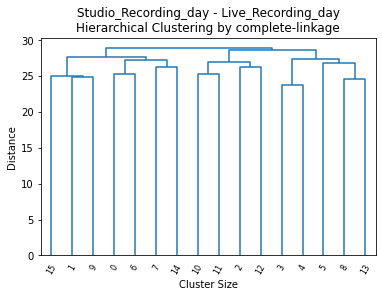

In [278]:
cut_distance = ""
plot_dendrogram(model_complete, cut_distance, "complete-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Average**

In [279]:
model_average = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='average').fit(df_tss_studio_live_scaled.values)

In [280]:
model_average.n_clusters_

16

In [281]:
hist, bins = np.histogram(model_average.labels_, bins=range(0, len(set(model_average.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 12, 1: 4}

Silhouette Score 0.030115201415453416
Separation Score 2.6430044070315986
Variance Ratio Criterion Score 1.4136158222787665

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 7, 1: 4, 2: 5}

Silhouette Score 0.03216635712889937
Separation Score 2.5229669376054145
Variance Ratio Criterion Score 1.4476322327052455

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 5, 1: 4, 2: 5, 3: 2}

Silhouette Score 0.03911882106052767
Separation Score 2.122924781281363
Variance Ratio Criterion Score 1.4275393490848751

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 4, 1: 3, 2: 5, 3: 2, 4: 2}

Silhouette Score 0.03994068939205039
Separation Score 1.8975974154908808
Variance Ratio Criterion Score 1.380463485039183

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 3, 1: 2, 2: 5, 3: 2, 4: 2, 5: 2}

Silhouette Score 0.03887313447

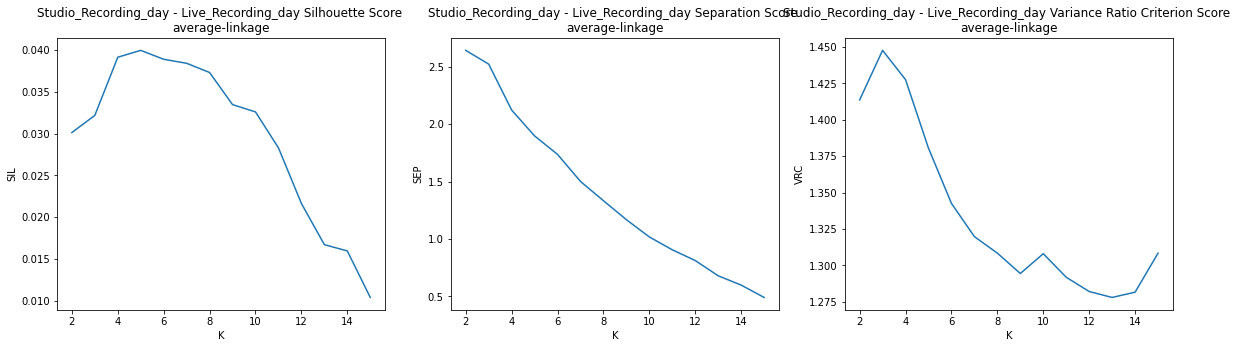

In [282]:
interpret_dendrogram(15, 'average', df_tss_studio_live_scaled.values)

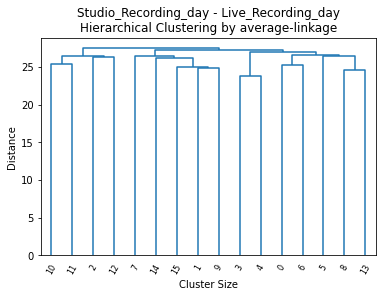

In [283]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

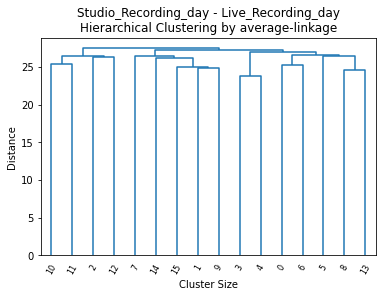

In [284]:
cut_distance = ""
plot_dendrogram(model_average, cut_distance, "average-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

**Ward**

In [285]:
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                                linkage='ward').fit(df_tss_studio_live_scaled.values)

In [286]:
model_ward.n_clusters_

16

In [287]:
hist, bins = np.histogram(model_ward.labels_, bins=range(0, len(set(model_ward.labels_)) + 1))
print ('Labels: ', dict(zip(bins, hist)))

Labels:  {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1}


Cluster numbers:  2
Cluster {0: 10, 1: 6}

Silhouette Score 0.027455932745192313
Separation Score 3.005359633080874
Variance Ratio Criterion Score 1.43613293262568

-------------------------------------------------

Cluster numbers:  3
Cluster {0: 6, 1: 4, 2: 6}

Silhouette Score 0.03224384383270779
Separation Score 2.522290062049601
Variance Ratio Criterion Score 1.4344390565082628

-------------------------------------------------

Cluster numbers:  4
Cluster {0: 4, 1: 4, 2: 6, 3: 2}

Silhouette Score 0.038820692529781
Separation Score 2.1403560459061577
Variance Ratio Criterion Score 1.4158593326192088

-------------------------------------------------

Cluster numbers:  5
Cluster {0: 6, 1: 4, 2: 2, 3: 2, 4: 2}

Silhouette Score 0.04179681189552789
Separation Score 1.9205329626534215
Variance Ratio Criterion Score 1.3729705716348681

-------------------------------------------------

Cluster numbers:  6
Cluster {0: 4, 1: 3, 2: 2, 3: 2, 4: 2, 5: 3}

Silhouette Score 0.041178386683572

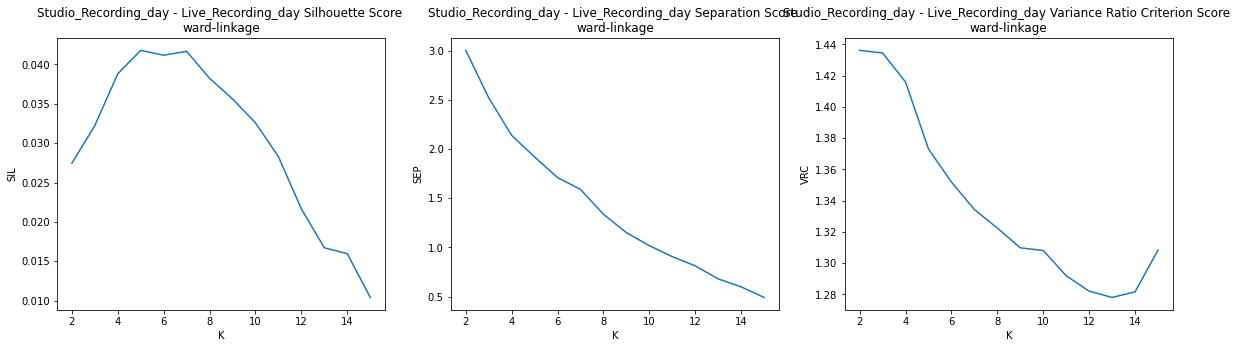

In [288]:
interpret_dendrogram(15, 'ward', df_tss_studio_live_scaled.values)

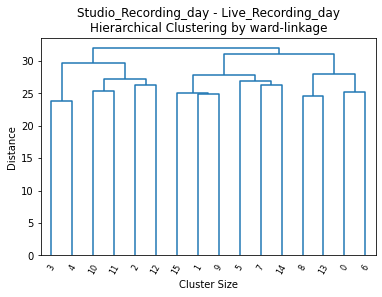

In [289]:
cut_distance = ""
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='lastp', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

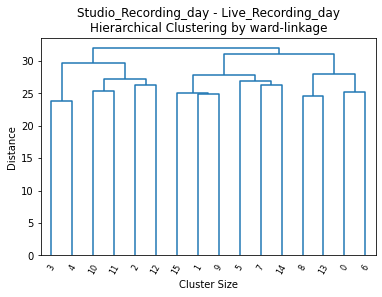

In [290]:
cut_distance = ""
plot_dendrogram(model_ward, cut_distance, "ward-linkage", album_type, truncate_mode='level', p=30, 
                leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [291]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  222.87309344740422 Silhouette Score:  0.7002611295480954
Calinski-Harabaz:  72.51218638085128 Davies-Bouldin:  0.40226396134051323

k:  3 SSE:  111.87371745691722 Silhouette Score:  0.6930138900676273
Calinski-Harabaz:  73.51882693292468 Davies-Bouldin:  0.3515451637062426

k:  4 SSE:  30.255402230253306 Silhouette Score:  0.7240904365847158
Calinski-Harabaz:  178.08071643689868 Davies-Bouldin:  0.3147259369887154

k:  5 SSE:  15.497119547055856 Silhouette Score:  0.6965228545124558
Calinski-Harabaz:  241.64291069495135 Davies-Bouldin:  0.2424747254576137

k:  6 SSE:  8.274107995450857 Silhouette Score:  0.6601132524690194
Calinski-Harabaz:  330.9014630459197 Davies-Bouldin:  0.29578560891443245

k:  7 SSE:  6.3557414188677175 Silhouette Score:  0.6040646248630253
Calinski-Harabaz:  323.5363500757683 Davies-Bouldin:  0.26797513271812334

k:  8 SSE:  4.225847703994512 Silhouette Score:  0.5751639771669903
Calinski-Harabaz:  371.3217396536428 Davies-Bouldin:  0.26775242218096

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  2.3401489071634494 Silhouette Score:  0.576417441841717
Calinski-Harabaz:  514.082577608009 Davies-Bouldin:  0.20319537399564094

k:  10 SSE:  1.043530840781914 Silhouette Score:  0.4958353722837505
Calinski-Harabaz:  879.1867915603467 Davies-Bouldin:  0.21721642001737407

k:  11 SSE:  0.7222450207514187 Silhouette Score:  0.4234149321526567
Calinski-Harabaz:  952.9377454827609 Davies-Bouldin:  0.16299937234387232

k:  12 SSE:  0.4034587810350173 Silhouette Score:  0.3710693572375449
Calinski-Harabaz:  1240.931424590564 Davies-Bouldin:  0.10896656641430924



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  13 SSE:  0.18866802456698362 Silhouette Score:  0.30054022310714
Calinski-Harabaz:  1824.6900391291533 Davies-Bouldin:  0.06395696984546978

k:  14 SSE:  0.03176308992505185 Silhouette Score:  0.21730145658816463
Calinski-Harabaz:  6670.536673965202 Davies-Bouldin:  0.03606738551062925

k:  15 SSE:  0.01363032324014006 Silhouette Score:  0.1076828098851484
Calinski-Harabaz:  7217.194412548228 Davies-Bouldin:  0.018150041047641795



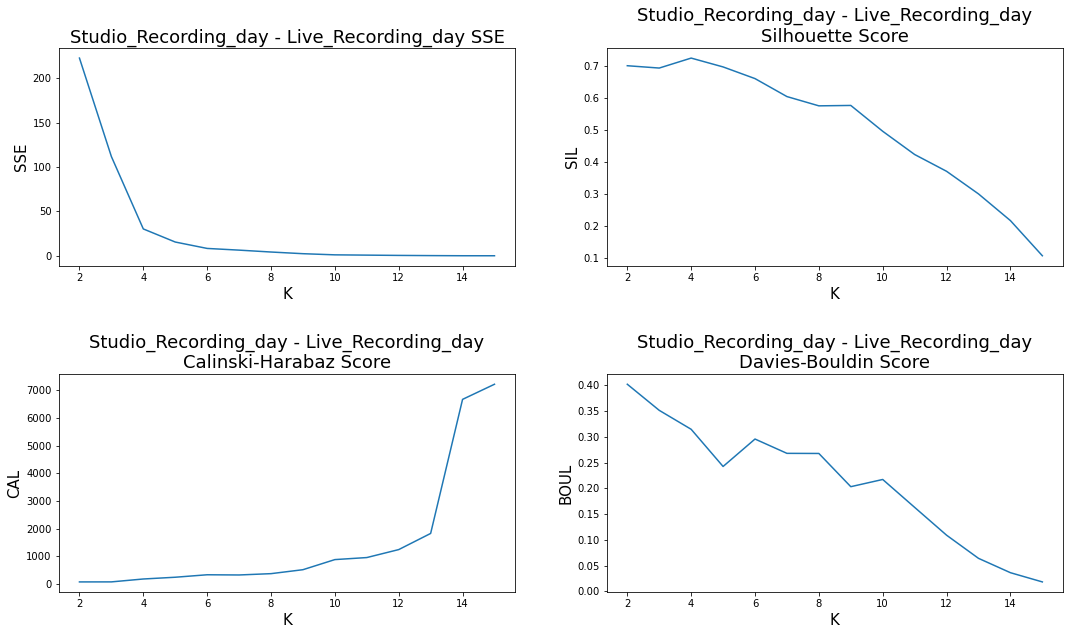

In [292]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [293]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(4, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (4, 5)

Labels:  {0: 4, 1: 5, 2: 4, 3: 3}

SSE:  30.255402230253306
Silhouette Score:  0.7240904365847158
Calinski - Harabaz Score:  178.08071643689868
Davies - Bouldin Score:  0.3147259369887154


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

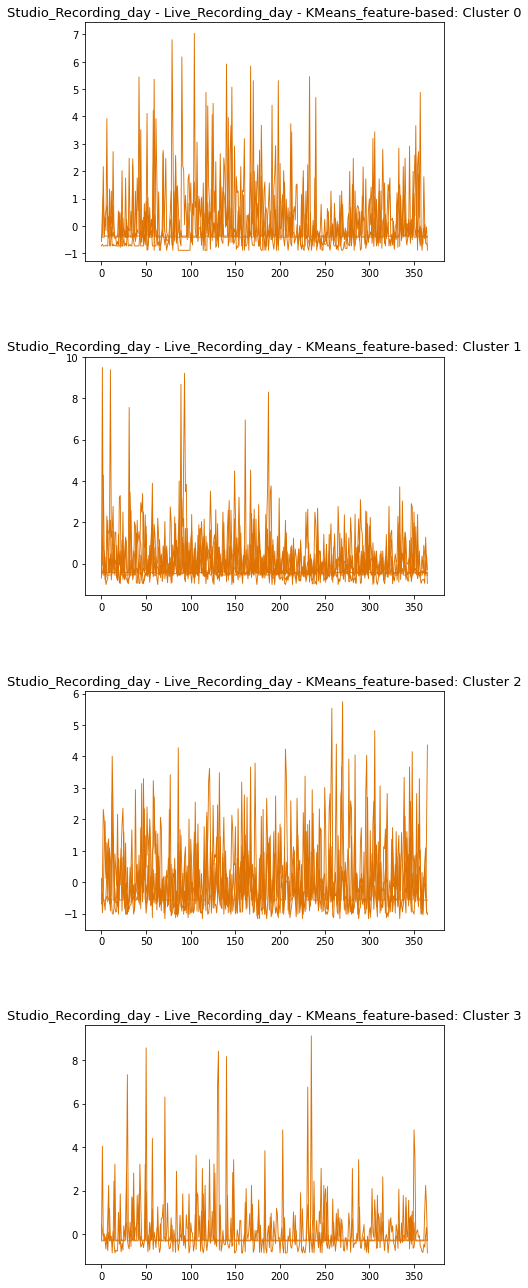

In [294]:
analyze_clusters(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

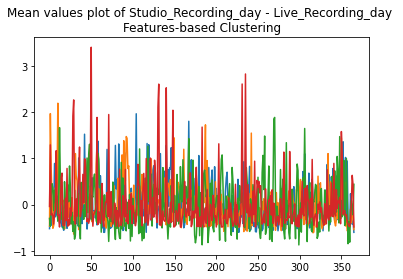

In [295]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [296]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [297]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 366, 1) (16, 16)


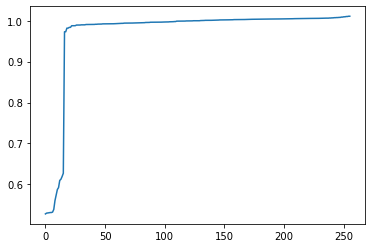

In [298]:
plt.plot(sorted(M.ravel()))
plt.show()

In [299]:
dbscan_compression_studio_live = DBSCAN(eps=0.99, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.99, metric='precomputed')

In [300]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0])

<h2>Approximation-based Clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [301]:
n_paa_segments = 8
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

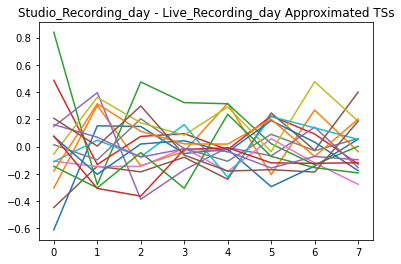

In [302]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " Approximated TSs")
plt.show()

k:  2 SSE:  0.22565213355659708 Silhouette Score:  0.4458844267533578

k:  3 SSE:  0.17648966018529555 Silhouette Score:  0.13606315772612582

k:  4 SSE:  0.14365996836743938 Silhouette Score:  0.131092664553564

k:  5 SSE:  0.11562334226996805 Silhouette Score:  0.15231298758274264

k:  6 SSE:  0.08755670788950282 Silhouette Score:  0.19497463784306046

k:  7 SSE:  0.07063479772469242 Silhouette Score:  0.17492237171525032

k:  8 SSE:  0.05945151240163792 Silhouette Score:  0.1406873656365608

k:  9 SSE:  0.04892093469547236 Silhouette Score:  0.13843106265912283

k:  10 SSE:  0.037791957199432485 Silhouette Score:  0.11772180188683005

k:  11 SSE:  0.0283252492595616 Silhouette Score:  0.12116795229723265

k:  12 SSE:  0.0213385791980051 Silhouette Score:  0.0889665776753014

k:  13 SSE:  0.012988478581158983 Silhouette Score:  0.069435291078432

k:  14 SSE:  0.007835435311720396 Silhouette Score:  0.05430615161194563

k:  15 SSE:  0.0030634243791576796 Silhouette Score:  0.033950534

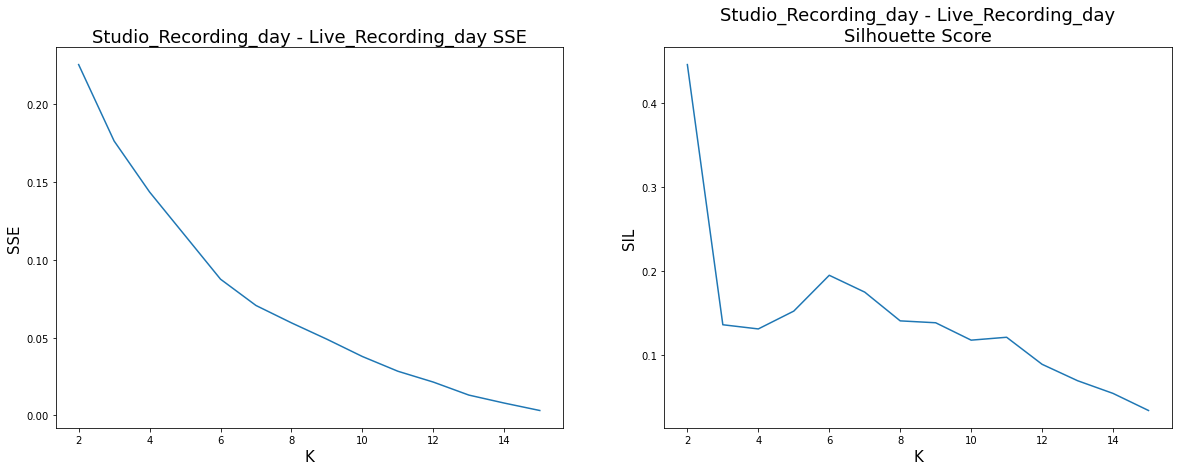

In [303]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [304]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(6, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (6, 8, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 5, 4: 3, 5: 1}

SSE:  0.092224044701019
Silhouette Score:  0.15536344642370462


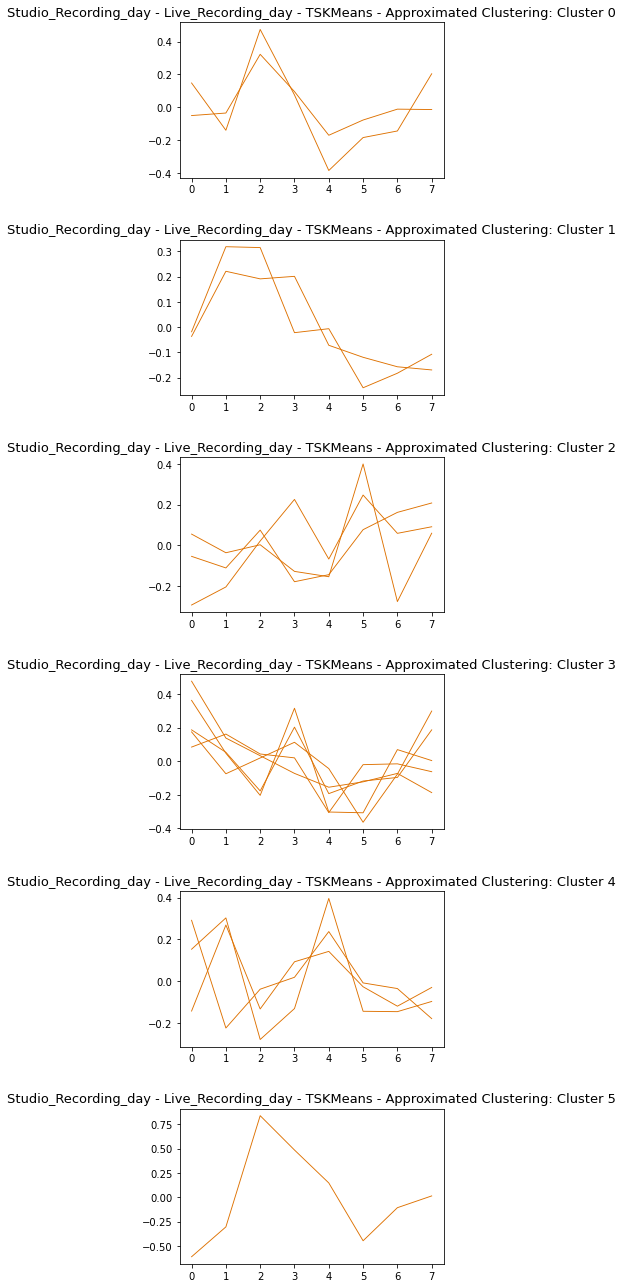

In [305]:
analyze_clusters(labels_studio_live_paa, X_paa, album_type, 'TSKMeans - Approximated Clustering', True)

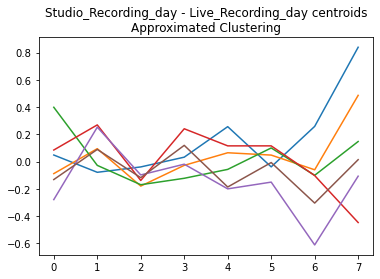

In [306]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type)

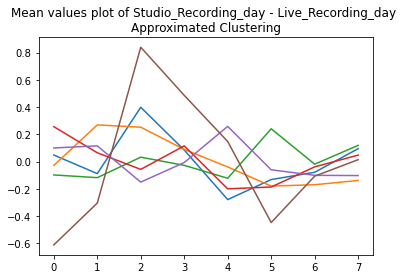

In [307]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type)